# SOMMAIRE

1. [Importation des bibliothèques](#importation-des-bibliothèques)
2. [Evolution du chiffre d'affaire et des ventes](#Evolution-du-chiffre-d'affaire-et-des-ventes)
    1. [Chiffre d'affaire et moyenne mobile](#Chiffre-d'affaire-et-moyenne-mobile)
    2. [Evolution du chiffre d'affaire par catégorie](#Evolution-du-chiffre-d'affaire-par-catégorie)
    3. [Evolution du nombre de clients par mois](#Evolution-du-nombre-de-clients-par-mois)
    4. [Evolution du nombre de transactions](#Evolution-du-nombre-de-transactions)
    5. [Evolution du nombre de produits vendus](#Evolution-du-nombre-de-produits-vendus)
    6. [Répartition du chiffre d'affaire par catégorie](#Répartition-du-chiffre-d'affaire-par-catégorie)
3. [Focus sur les références](#Focus-sur-les-références)
    1. [Les Tops et les Flops](#Les-Tops-et-les-Flops)
    2. [Répartition des ventes par catégorie](#Répartition-des-ventes-par-catégorie)
4. [Profils clients](#Profils-clients)
    1. [Répartition du chiffre d'affaires pour les clients BtoB](#Répartition-du-chiffre-d'affaires-pour-les-clients-BtoB)
    2. [Courbe de Lorenz](#Courbe-de-Lorenz)
5. [Analyse comportementale des clients](#Analyse-comportementale-des-clients)
    1. [Lien entre le genre d’un client et les catégories des livres achetés](#Lien-entre-le-genre-d’un-client-et-les-catégories-des-livres-achetés)
    2. [Lien entre l'âge des clients et le montant total des achats](#Lien-entre-l'âge-des-clients-et-le-montant-total-des-achats)
    3. [Lien entre l'âge des clients et la fréquence d’achat](#Lien-entre-l'âge-des-clients-et-la-fréquence-d’achat)
    4. [Lien entre l'âge des clients et la taille du panier moyen](#Lien-entre-l'âge-des-clients-et-la-taille-du-panier-moyen)
    5. [Lien entre l'âge des clients et la catégorie des livres achetés](#Lien-entre-l'âge-des-clients-et-la-catégorie-des-livres-achetés)


<h2 id="importation-des-bibliothèques">Importation des bibliothèques</h2>

In [1]:
#importation des bibliothèques necessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df_final = pd.read_csv ('merge_2.csv')
df_final['date'] = pd.to_datetime(df_final['date'], format='%Y-%m-%d %H:%M:%S.%f')
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['tranche_age'] = df_final['tranche_age'].astype('category')
df_final['year_month'] = df_final['year_month'].astype('period[M]')

In [3]:
df_final.head()

,client_id,sex,birth,age,tranche_age,id_prod,date,session_id,year_month,price,categ
0,c_329,f,1967,57,50-59,0_1259,2021-03-01 00:01:07.843138,s_1,2021-03,11.99,0
1,c_664,m,1960,64,60-69,0_1390,2021-03-01 00:02:26.047414,s_2,2021-03,19.37,0
2,c_580,m,1988,36,30-39,0_1352,2021-03-01 00:02:38.311413,s_3,2021-03,4.50,0
3,c_7912,f,1989,35,30-39,0_1458,2021-03-01 00:04:54.559692,s_4,2021-03,6.55,0
4,c_2033,f,1956,68,60-69,0_1358,2021-03-01 00:05:18.801198,s_5,2021-03,16.49,0


# Evolution du chiffre d'affaire et des ventes

<h3 id="chiffre-d'affaire-et-moyenne-mobile">Chiffre d'affaire et moyenne mobile</h3>

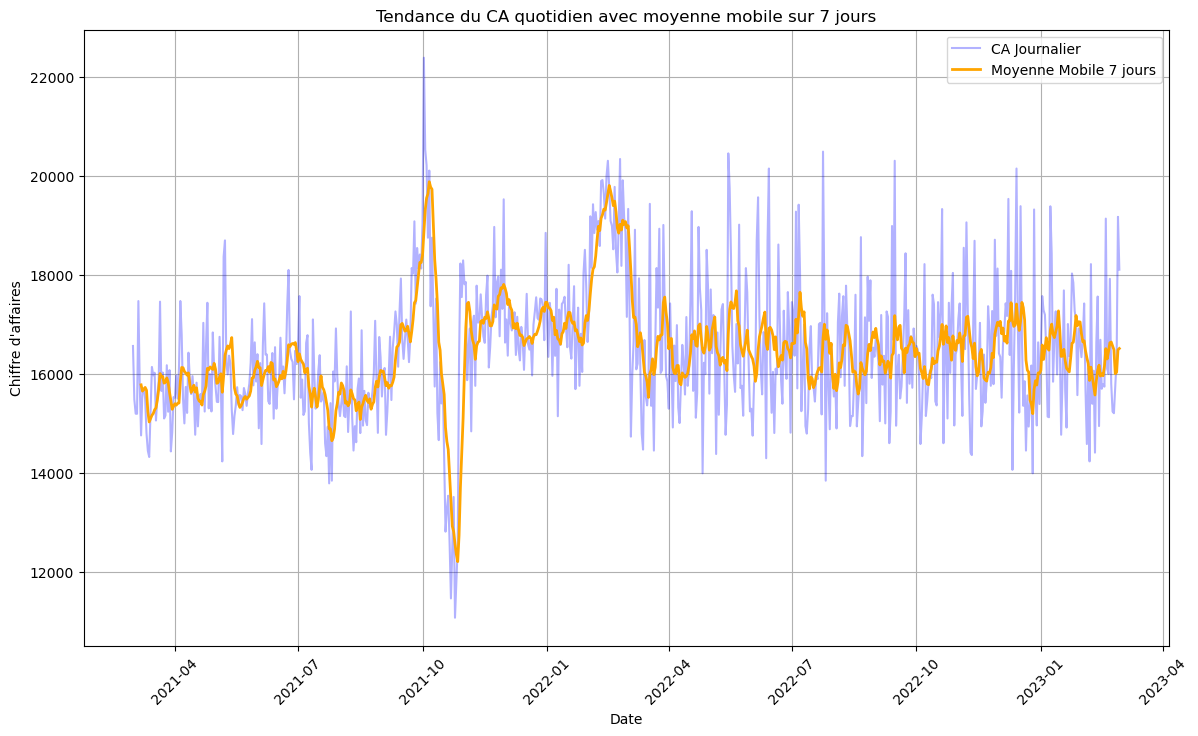

In [4]:
#CA QUOTIDIEN ET MOYENNE MOBILE SUR 7 JOURS

# Calculer le chiffre d'affaires quotidien
CA_quotidien = df_final.groupby(df_final['date'].dt.date)['price'].sum().reset_index()
CA_quotidien.columns = ['date', 'CA_journalier']

# Appliquer une moyenne mobile de 30 jours au chiffre d'affaires quotidien
CA_quotidien['moy_mobile'] = CA_quotidien['CA_journalier'].rolling(window=7).mean()

# Représenter graphiquement la moyenne mobile et le chiffre d'affaires quotidien
plt.figure(figsize=(14, 8))
plt.plot(CA_quotidien['date'], CA_quotidien['CA_journalier'], label='CA Journalier', color='blue', alpha=0.3)
plt.plot(CA_quotidien['date'], CA_quotidien['moy_mobile'], label='Moyenne Mobile 7 jours', color='orange', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Tendance du CA quotidien avec moyenne mobile sur 7 jours')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

3 phases distinctes:
- Stabilité du CA entre 03/2021 à 08/2021
- Période de fluctations entre 09/2021 à 03/2022
- Stabilité du CA entre 04/2022 jusqu'à 03/2023

Rentrée littéraire?
Problème de stock?
Fermeture exceptionnelle?


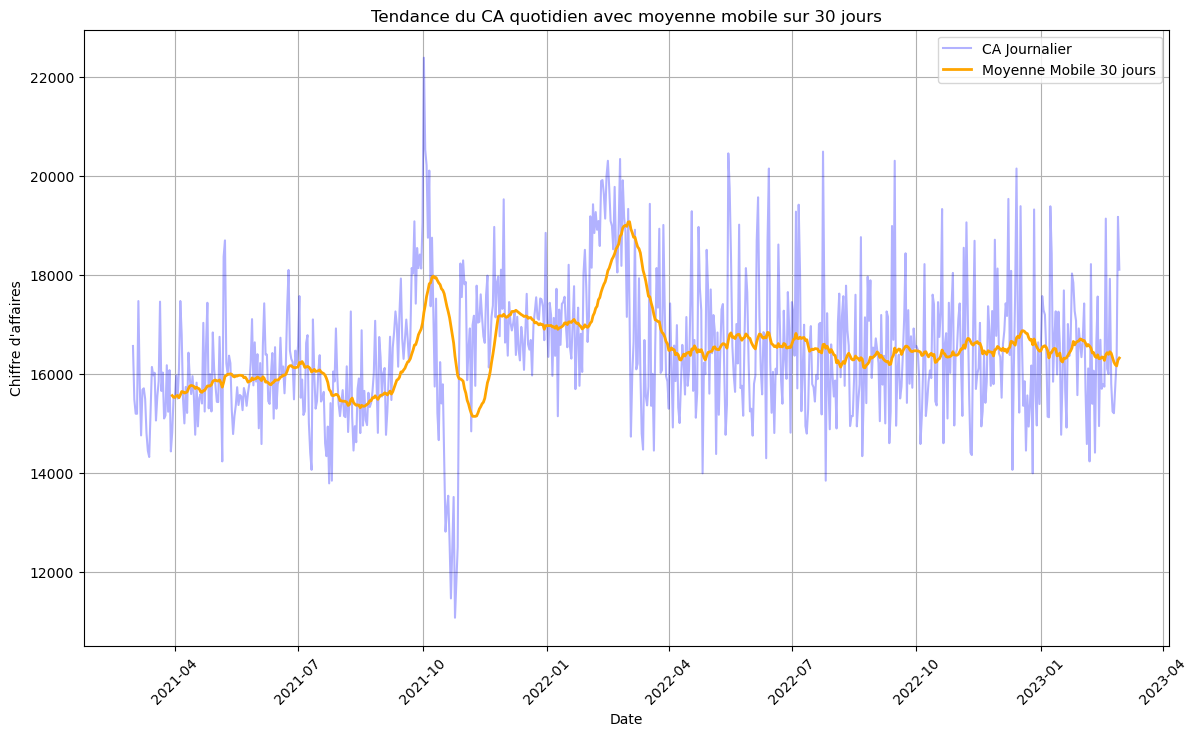

In [5]:
#CA QUOTIDIEN ET MOYENNE MOBILE SUR 30 JOURS

# Appliquer une moyenne mobile de 30 jours au chiffre d'affaires quotidien
CA_quotidien['moy_mobile'] = CA_quotidien['CA_journalier'].rolling(window=30).mean()

# Représenter graphiquement la moyenne mobile et le chiffre d'affaires quotidien
plt.figure(figsize=(14, 8))
plt.plot(CA_quotidien['date'], CA_quotidien['CA_journalier'], label='CA Journalier', color='blue', alpha=0.3)
plt.plot(CA_quotidien['date'], CA_quotidien['moy_mobile'], label='Moyenne Mobile 30 jours', color='orange', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Tendance du CA quotidien avec moyenne mobile sur 30 jours')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [6]:
#Scinder le df en 2 periode comptable distinct pour permettre des comparaison
# Définir les périodes
start_date1 = '2021-03-01'
end_date1 = '2022-02-28'
start_date2 = '2022-03-01'
end_date2 = '2023-02-28'

# Filtrer le DataFrame pour la première période
df_2021 = df_final[(df_final['date'] >= start_date1) & (df_final['date'] <= end_date1)]

# Filtrer le DataFrame pour la deuxième période
df_2022 = df_final[(df_final['date'] >= start_date2) & (df_final['date'] <= end_date2)]

# Afficher le nombre de lignes pour chaque DataFrame pour vérifier
print("Nombre de lignes pour la période 1:", df_2021.shape[0])
print("Nombre de lignes pour la période 2:", df_2022.shape[0])

Nombre de lignes pour la période 1: 344560
Nombre de lignes pour la période 2: 340965


In [7]:
# Calcul du CA mensuel pour 2021
ca_mensuel_2021 = df_2021.groupby('year_month')['price'].sum()

# Calcul du CA mensuel pour 2022
ca_mensuel_2022 = df_2022.groupby('year_month')['price'].sum()

# Affichage des résultats
print("CA mensuel pour la période 1:")
print(ca_mensuel_2021)
print("\nCA mensuel pour la période 2:")
print(ca_mensuel_2022)

CA mensuel pour la période 1:
year_month
2021-03    482440.61
2021-04    476109.30
2021-05    492943.47
2021-06    484088.56
2021-07    482835.40
2021-08    482284.79
2021-09    507240.68
2021-10    494733.16
2021-11    516167.73
2021-12    525917.28
2022-01    525338.99
2022-02    516713.23
Freq: M, Name: price, dtype: float64

CA mensuel pour la période 2:
year_month
2022-03    515456.53
2022-04    492998.94
2022-05    517132.60
2022-06    496016.12
2022-07    510783.12
2022-08    506467.27
2022-09    494114.53
2022-10    507917.77
2022-11    496664.94
2022-12    510219.50
2023-01    517540.55
2023-02    438574.61
Freq: M, Name: price, dtype: float64


In [8]:
ca_mensuel_2021.mean()

498901.0999999999

In [9]:
ca_mensuel_2022.mean()

500323.87333333335

In [10]:
CA_2021 = round(df_2021['price'].sum(), 2)
CA_2022 = round(df_2022['price'].sum(), 2)
evol_CA = round((CA_2022 - CA_2021)/ CA_2021 * 100, 2)

print("Le CA de l'année 2021 est de:", CA_2021)
print("Le CA de l'année 2022 est de:", CA_2022 )
print("Le CA entre 2021 et 2021 a évolué de:", evol_CA)

Le CA de l'année 2021 est de: 5986813.2
Le CA de l'année 2022 est de: 6003886.48
Le CA entre 2021 et 2021 a évolué de: 0.29


In [11]:
# Grouper les données par catégorie et compter les 'id_prod' uniques dans chaque catégorie
nombre_id_prod_unique_par_categorie = df_final.groupby('categ')['id_prod'].nunique()

# Afficher le résultat
print(nombre_id_prod_unique_par_categorie)

categ
0    2292
1     737
2     236
Name: id_prod, dtype: int64


In [12]:
df_final['client_id'].nunique()

8600

<h3 id="evolution-du-chiffre-d'affaire-par-catégorie">Evolution du chiffre d'affaire par catégorie</h3>

In [13]:
# Aggréger le chiffre d'affaires par catégorie
chiffre_affaire_par_categ = df_final.groupby('categ')['price'].sum().reset_index()

# Afficher le résultat
print(chiffre_affaire_par_categ)

   categ       price
0      0  4419730.97
1      1  4827657.11
2      2  2780275.02


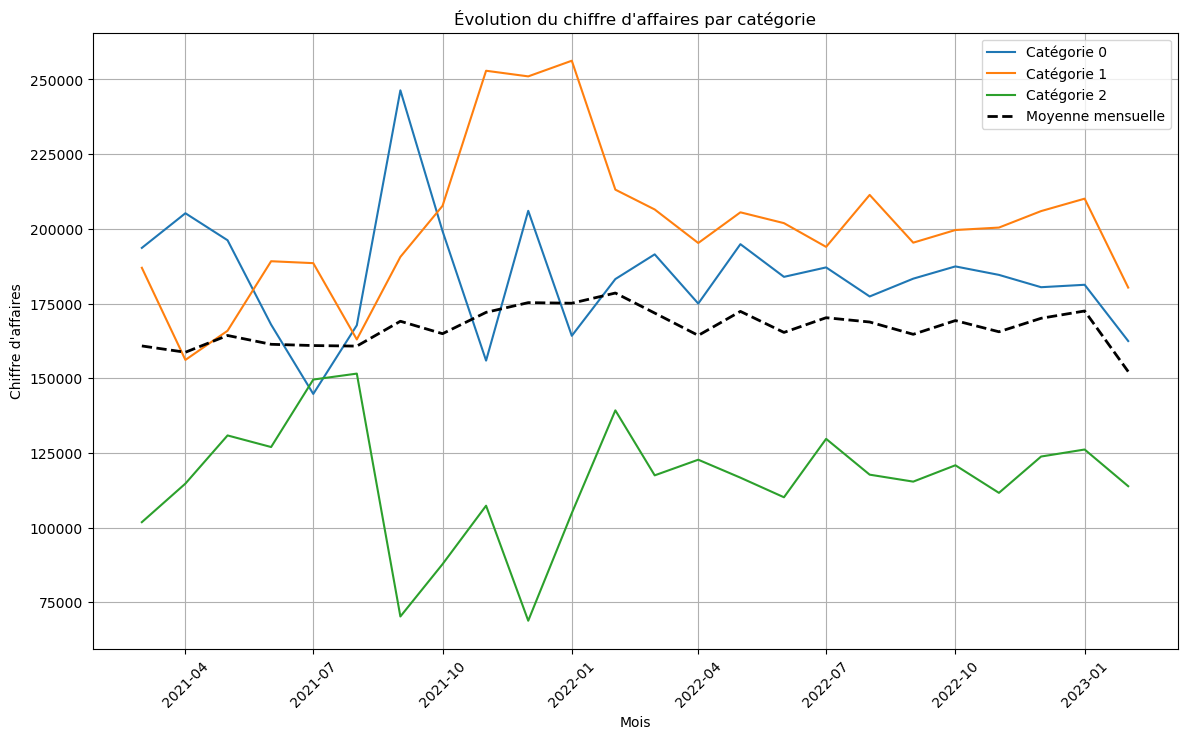

In [14]:
CA_mensuel = df_final.groupby(['year_month', 'categ']).agg({'price': 'sum'}).reset_index()
CA_mensuel['year_month'] = pd.to_datetime(CA_mensuel['year_month'].astype(str))

# Tracer le graphique
plt.figure(figsize=(14, 8))

for categ in CA_mensuel['categ'].unique():
    df_categ = CA_mensuel[CA_mensuel['categ'] == categ]
    plt.plot(df_categ['year_month'], df_categ['price'], label=f'Catégorie {categ}')

# Calculer et tracer le CA mensuel moyen
CA_moyen_mensuel = CA_mensuel.groupby('year_month')['price'].mean()
plt.plot(CA_moyen_mensuel.index, CA_moyen_mensuel, label='Moyenne mensuelle', color='black', linewidth=2, linestyle='--')

plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires par catégorie')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

Ce graphique illustre l'évolution du chiffre d'affaires par catégorie de produits sur une période allant d'avril 2021 à mars 2023. Voici une analyse détaillée de ce graphique :

Analyse des Tendances par Catégorie

Catégorie 0 :

Cette catégorie montre une volatilité significative avec plusieurs pics, notamment autour de juillet 2021, février 2022, et juin 2022.

Catégorie 1 :

Cette catégorie montre une performance plus stable avec des pics notables en juillet 2021 et juillet 2022, indiquant peut-être une saisonnalité ou des événements spécifiques qui stimulent les ventes.

Catégorie 2 :

Cette catégorie commence avec une croissance jusqu'à mi-2021.
Par la suite, la catégorie montre une relative stabilité avec moins de fluctuations que les autres catégories.


Implications Stratégiques

La variabilité observée suggère une gestion prudente des stocks, surtout pour les catégories 0 et 1. Les pics peuvent indiquer des périodes idéales pour des promotions ciblées.
Les pics périodiques en juillet pour la catégorie 1 suggèrent une possible influence saisonnière qui pourrait être exploitée pour maximiser les ventes.
La stabilité relative de la catégorie 2 peut indiquer une demande constante, qui peut être davantage exploitée ou améliorée par des stratégies marketing adaptées.

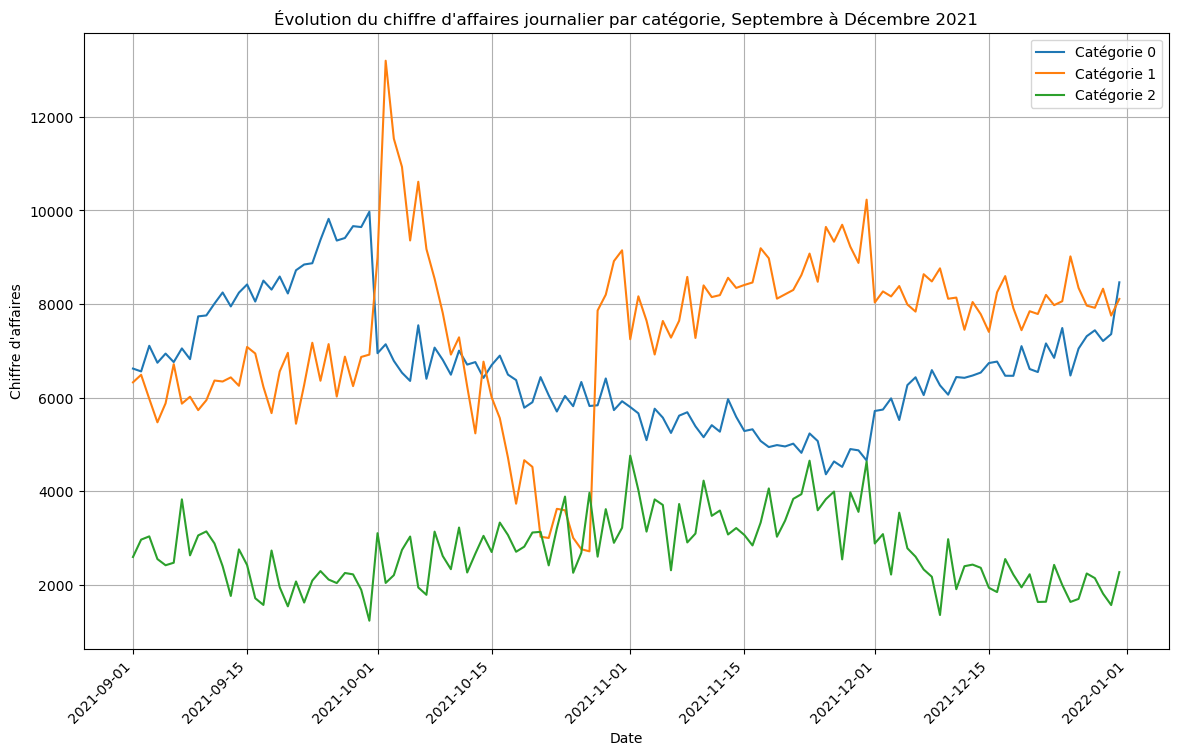

In [15]:
# Convertir la colonne 'date' de string à datetime
df_final['date'] = pd.to_datetime(df_final['date'])

# Réduire la précision de datetime à la date seulement
df_final['date'] = df_final['date'].dt.date

# Filtrer les données pour la période spécifiée
df_filtered = df_final[df_final['date'].between(pd.to_datetime('2021-09-01').date(), pd.to_datetime('2021-12-31').date())]

# Grouper par date et catégorie, puis calculer le CA journalier
CA_journalier = df_filtered.groupby(['date', 'categ']).agg({'price': 'sum'}).reset_index()
CA_journalier['date'] = pd.to_datetime(CA_journalier['date']) 

# Tracer le graphique
plt.figure(figsize=(14, 8))

for categ in CA_journalier['categ'].unique():
    df_categ = CA_journalier[CA_journalier['categ'] == categ]
    plt.plot(df_categ['date'], df_categ['price'], label=f'Catégorie {categ}')  


plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires journalier par catégorie, Septembre à Décembre 2021')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

<h3 id="evolution-du-nombre-de-clients-par-mois">Evolution du nombre de clients par mois</h3>

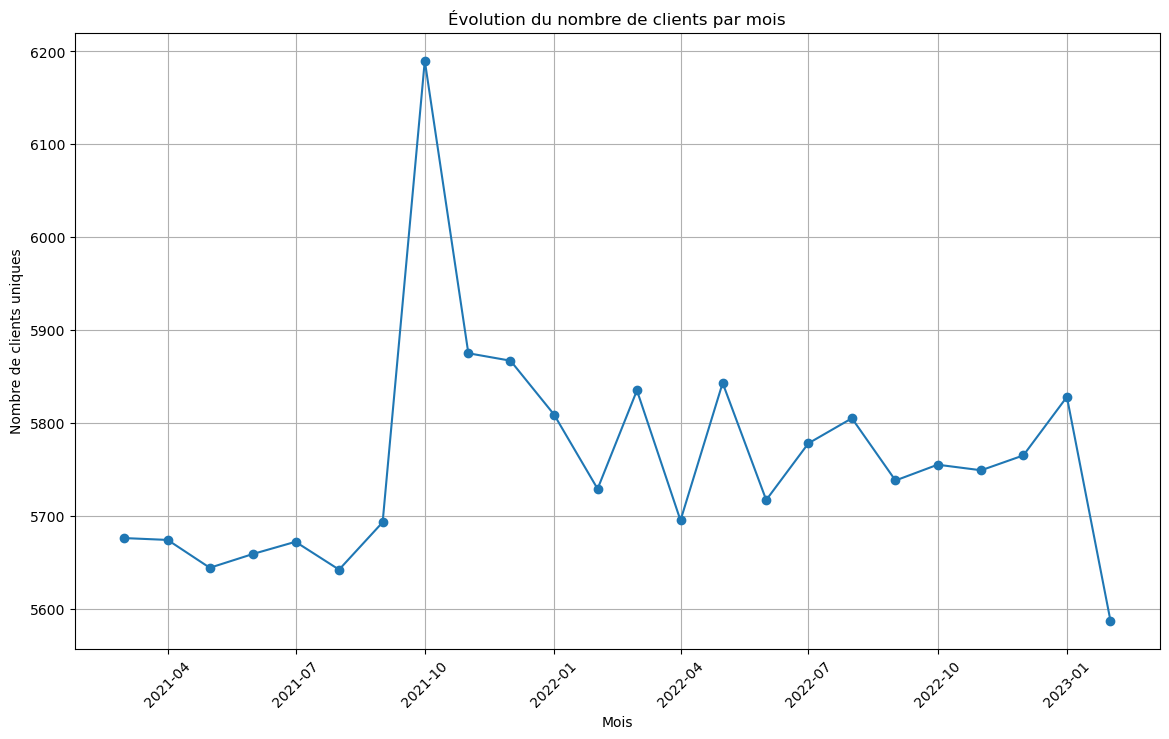

In [16]:
# Grouper par mois et compter le nombre de clients uniques

clients_par_mois = df_final.groupby('year_month')['client_id'].nunique().reset_index()

# Transformer la période en format datetime pour l'affichage

clients_par_mois['year_month'] = clients_par_mois['year_month'].dt.to_timestamp()

# Tracer le graphique

plt.figure(figsize=(14, 8))
plt.plot(clients_par_mois['year_month'], clients_par_mois['client_id'], marker='o', linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Nombre de clients uniques')
plt.title('Évolution du nombre de clients par mois')
plt.grid(True)
plt.xticks(rotation=45)

# Afficher le graphique

plt.show()

### Evolution du nombre de transactions

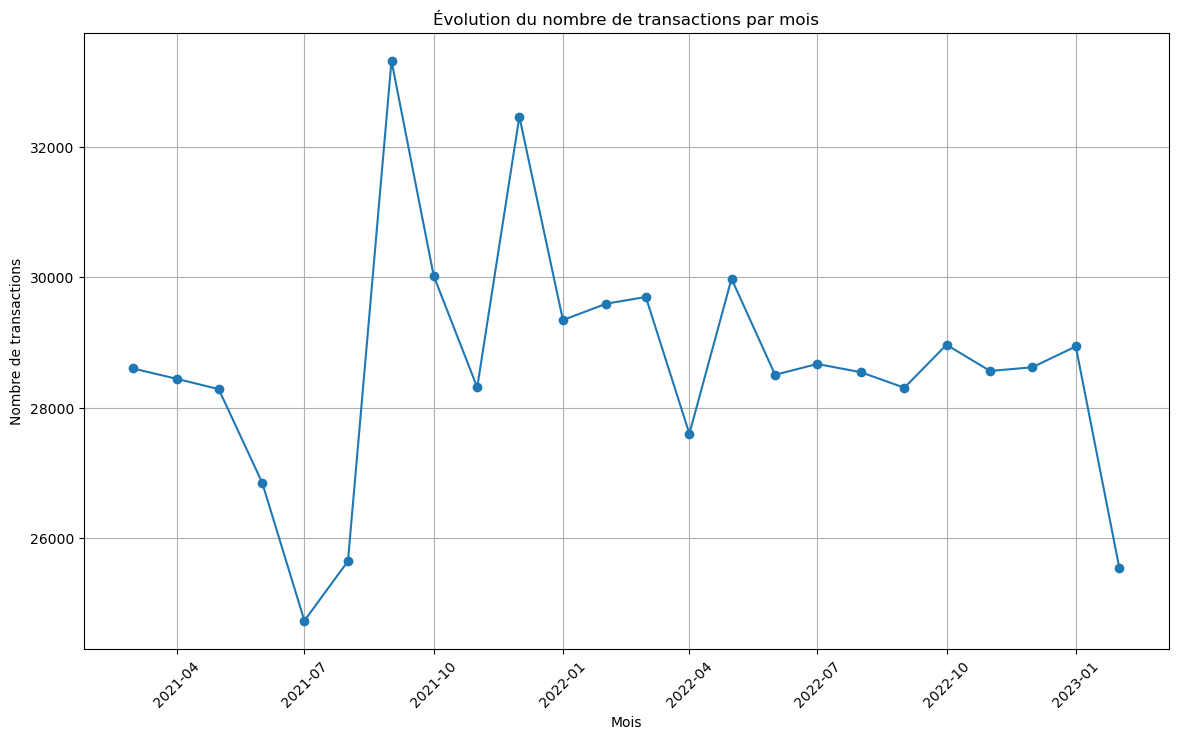

In [17]:
# Grouper par mois et compter le nombre de transactions

transactions_par_mois = df_final.groupby('year_month').size().reset_index(name='nombre_transactions')

# Transformer la période en format datetime pour l'affichage

transactions_par_mois['year_month'] = transactions_par_mois['year_month'].dt.to_timestamp()

# Tracer le graphique

plt.figure(figsize=(14, 8))
plt.plot(transactions_par_mois['year_month'], transactions_par_mois['nombre_transactions'], marker='o', linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.title('Évolution du nombre de transactions par mois')
plt.grid(True)
plt.xticks(rotation=45)

# Afficher le graphique

plt.show()

### Evolution du nombre de produits vendus

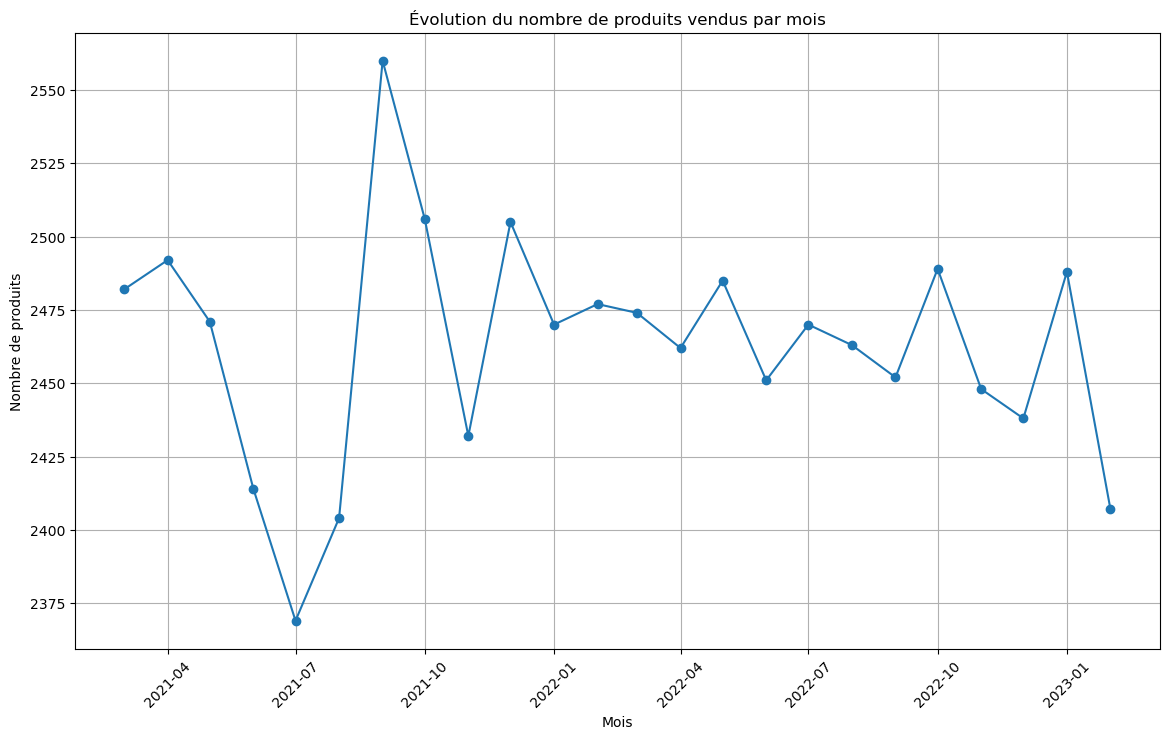

In [18]:
# Grouper par mois et compter le nombre de produits
produits_par_mois = df_final.groupby('year_month')['id_prod'].nunique().reset_index()

# Transformer la période en format datetime pour l'affichage
produits_par_mois['year_month'] = produits_par_mois['year_month'].dt.to_timestamp()

# Tracer le graphique
plt.figure(figsize=(14, 8))
plt.plot(produits_par_mois['year_month'], produits_par_mois['id_prod'], marker='o', linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Nombre de produits')
plt.title('Évolution du nombre de produits vendus par mois')
plt.grid(True)
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

### Répartition du chiffre d'affaire par catégorie

In [19]:
# Calculer le nombre d'articles vendus par catégorie
nombre_articles_par_categorie = df_final.groupby('categ')['id_prod'].count()

# Calculer le nombre de ventes uniques par catégorie
nombre_ventes_par_categorie = df_final.groupby('categ')['session_id'].nunique()

# Afficher les résultats
print(nombre_ventes_par_categorie)
print(nombre_articles_par_categorie)

categ
0    225449
1    183610
2     30574
Name: session_id, dtype: int64
categ
0    415459
1    235592
2     36483
Name: id_prod, dtype: int64


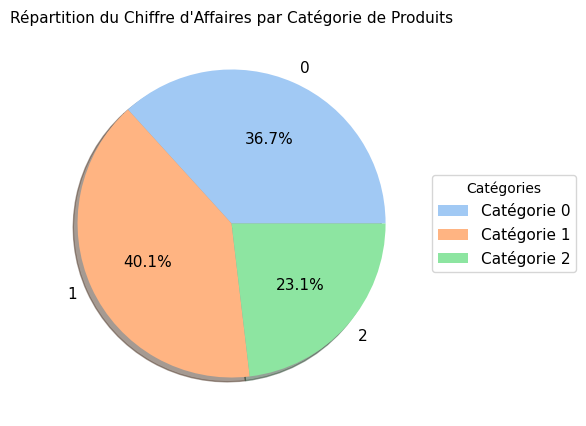

In [20]:
# Calculer le chiffre d'affaires par catégorie de produit
ca_par_categorie = df_final.groupby('categ')['price'].sum().reset_index()

# Créer un pie chart de la répartition en CA des catégories de produits
plt.figure(figsize=(10, 5))
colors = sns.color_palette("pastel")
plt.pie(x=ca_par_categorie['price'], 
        labels=ca_par_categorie['categ'],
        colors=colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        #explode=(0.1, 0.1, 0.1), 
        shadow=True)

plt.title("Répartition du Chiffre d'Affaires par Catégorie de Produits", fontsize=11)
plt.legend(title='Catégories',
           labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.savefig('pie_ca_categ.png')
plt.show()

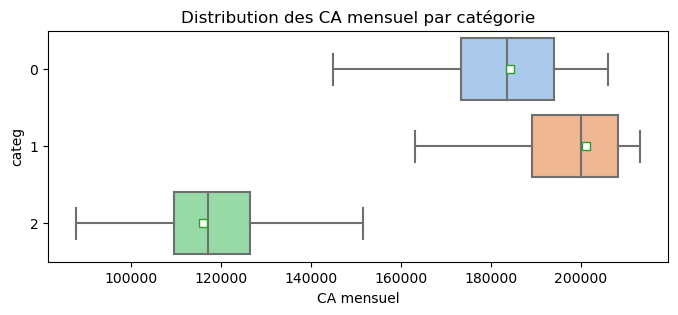

In [21]:
# Aggrégation par mois et catégorie de produit
CA_categ_mois = df_final.groupby(['categ','year_month'])['price'].sum().reset_index().rename(columns={'price':'CA mensuel'})

# Distribution et moyenne des CA mensuel par catégorie

plt.figure(figsize=(8,3))
sns.boxplot(data=CA_categ_mois, y='categ', x='CA mensuel', 
            orient='h', 
            showmeans=True,
            showfliers=False,
            palette="pastel", 
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des CA mensuel par catégorie')
plt.savefig('CA_mensuel_categ_boxplot.png')
plt.show()

# Focus sur les références

### Les Tops et les Flops

Nombre total de ventes : 687534
Nombre de produits responsables de 80% des ventes : 809 soit 24.78% des produits vendus 


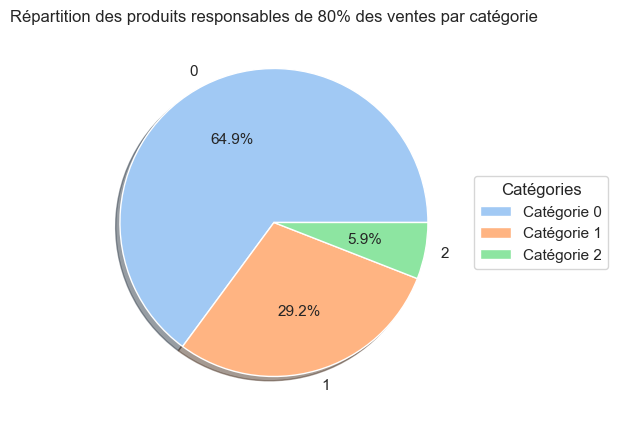

In [22]:
# Aggrégation par identifiant produit et catégorie
df_ref = df_final.groupby(['id_prod','categ','price'])['date'].count().reset_index().sort_values(['date'], ascending=False)
df_ref.rename(columns={'date': 'nb_ventes'}, inplace=True)

# Calculer le nombre total de ventes
total_ventes = df_ref['nb_ventes'].sum()

#Calculer le nombre de produits
nb_produits = df_final['id_prod'].nunique()

# Trier les produits par nombre de ventes décroissant
df_ref_sorted = df_ref.sort_values(by='nb_ventes', ascending=False)

# Calculer la part cumulée des ventes
df_ref_sorted['cumulative_ventes'] = df_ref_sorted['nb_ventes'].cumsum()
df_ref_sorted['cumulative_ventes_percentage'] = df_ref_sorted['cumulative_ventes'] / total_ventes * 100

# Trouver le nombre de produits responsables de 80% des ventes
num_products_80_ventes = df_ref_sorted[df_ref_sorted['cumulative_ventes_percentage'] <= 80].shape[0]

#Proportion des produits représentant 80% des ventes

prop_products_V = round(num_products_80_ventes / nb_produits * 100, 2)

# Afficher les résultats
print(f"Nombre total de ventes : {total_ventes}")
print(f"Nombre de produits responsables de 80% des ventes : {num_products_80_ventes} soit {prop_products_V}% des produits vendus ")

# Filtrer les données pour obtenir uniquement les produits responsables de 80% des ventes
products_80 = df_ref_sorted[df_ref_sorted['cumulative_ventes_percentage'] <= 80]

# Aggréger les données pour obtenir le nombre de produits par catégorie dans ce groupe
categ_count_80 = products_80.groupby('categ').size()

# Créer un diagramme en secteurs pour montrer la répartition des produits par catégorie
# Appliquer le style de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))  
colors = sns.color_palette("pastel")
plt.pie(categ_count_80, 
        labels=categ_count_80.index,
        colors=colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        #explode=(0.1, 0.1, 0.1), 
        shadow=True)
plt.legend(title='Catégories',
           labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title('Répartition des produits responsables de 80% des ventes par catégorie')
plt.show()

Nombre de produits uniques vendus: 3265
Nombre de produits responsables de 80% du CA : 699 soit 21.41% des produits vendus


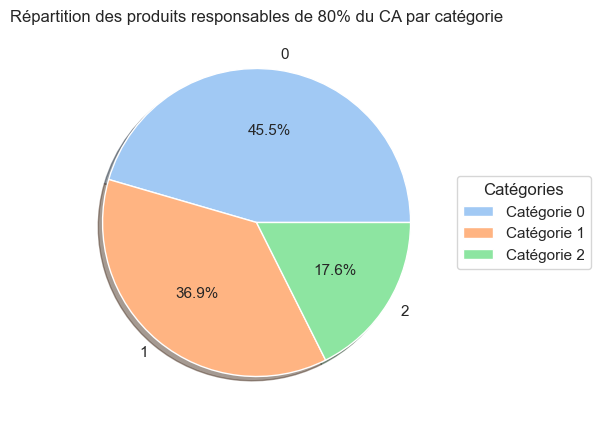

In [23]:
# Calculer le chiffre d'affaires total par produit
ca_par_produit = df_final.groupby('id_prod')['price'].sum().reset_index()

# Trier les produits par chiffre d'affaires décroissant
ca_par_produit_sorted = ca_par_produit.sort_values(by='price', ascending=False)

# Calculer la part cumulée du chiffre d'affaires
ca_par_produit_sorted['cumulative_ca'] = ca_par_produit_sorted['price'].cumsum()
ca_par_produit_sorted['cumulative_ca_percentage'] = ca_par_produit_sorted['cumulative_ca'] / ca_par_produit_sorted['price'].sum() * 100

# Trouver le nombre de produits responsables de 80% du CA
num_products_80_ca = ca_par_produit_sorted[ca_par_produit_sorted['cumulative_ca_percentage'] <= 80].shape[0]

#Proportion des produits représentant 80% du CA

prop_products_CA = round(num_products_80_ca / nb_produits * 100, 2)

# Afficher le résultat
print(f"Nombre de produits uniques vendus: {nb_produits}" )
print(f"Nombre de produits responsables de 80% du CA : {num_products_80_ca} soit {prop_products_CA}% des produits vendus")

# Filtrer pour obtenir uniquement les produits responsables de 80% du CA
products_80_ca = ca_par_produit_sorted[ca_par_produit_sorted['cumulative_ca_percentage'] <= 80]

# Joindre les données pour obtenir la catégorie de chaque produit
# Supposons que df_products est un DataFrame qui contient les colonnes 'id_prod' et 'categ'
df_products_80_ca = products_80_ca.merge(df_final[['id_prod', 'categ']].drop_duplicates(), on='id_prod', how='left')

# Aggréger les données pour obtenir le nombre de produits par catégorie dans ce groupe
categ_count_80_ca = df_products_80_ca.groupby('categ').size()

# Appliquer le style de Seaborn
sns.set(style="whitegrid")

# Créer un diagramme en secteurs pour montrer la répartition des produits par catégorie
plt.figure(figsize=(10, 5))  
colors = sns.color_palette("pastel")
plt.pie(categ_count_80_ca, 
        labels=categ_count_80_ca.index,
        colors=colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        shadow=True)
plt.legend(title='Catégories',
           labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title('Répartition des produits responsables de 80% du CA par catégorie')
plt.show()

In [24]:
# Calculer les produits générant le plus de CA
df_ca = df_final.groupby(['id_prod', 'categ'])['price'].sum().reset_index()
df_ca.rename(columns={'price': 'ca_total'}, inplace=True)
df_ca_sorted = df_ca.sort_values(by='ca_total', ascending=False)
tops_ca = df_ca_sorted.head(10)

# Calculer les produits générant le plus de ventes
df_ventes = df_final.groupby(['id_prod', 'categ'])['id_prod'].count().reset_index(name='nb_ventes')
df_ventes_sorted = df_ventes.sort_values(by='nb_ventes', ascending=False)
tops_ventes = df_ventes_sorted.head(10)

# Identifier les produits figurant dans les deux listes
produits_communs = pd.merge(tops_ca, tops_ventes, on=['id_prod', 'categ'])

# Afficher les résultats
print("Produits générant le plus de CA :\n\n", tops_ca)
print("\nProduits générant le plus de ventes :\n\n", tops_ventes)
print("\nProduits figurant dans les deux listes :\n\n", produits_communs)

Produits générant le plus de CA :

      id_prod  categ  ca_total
3096   2_159      2  94893.50
3070   2_135      2  69334.95
3045   2_112      2  65407.76
3034   2_102      2  60736.78
3152   2_209      2  56971.86
2619   1_395      1  56617.47
2591   1_369      1  56136.60
3043   2_110      2  53846.25
2607   1_383      1  53834.43
2641   1_414      1  53522.18

Produits générant le plus de ventes :

      id_prod  categ  nb_ventes
2591   1_369      1       2340
2644   1_417      1       2269
2641   1_414      1       2246
2733   1_498      1       2202
2653   1_425      1       2163
2629   1_403      1       2040
2640   1_413      1       2036
2639   1_412      1       2014
2632   1_406      1       2003
2633   1_407      1       2001

Produits figurant dans les deux listes :

   id_prod  categ  ca_total  nb_ventes
0   1_369      1  56136.60       2340
1   1_414      1  53522.18       2246


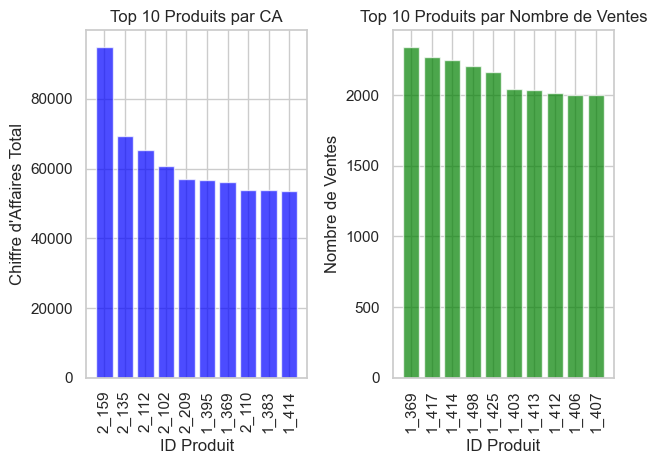

Produits figurant dans les deux listes :

   id_prod  categ  ca_total  nb_ventes
0   1_369      1  56136.60       2340
1   1_414      1  53522.18       2246


In [25]:
# Graphique des produits générant le plus de CA
plt.subplot(1, 2, 1)
plt.bar(tops_ca['id_prod'], tops_ca['ca_total'], color='blue', alpha=0.7)
plt.xlabel('ID Produit')
plt.ylabel('Chiffre d\'Affaires Total')
plt.title('Top 10 Produits par CA')
plt.xticks(rotation=90)

# Graphique des produits générant le plus de ventes
plt.subplot(1, 2, 2)
plt.bar(tops_ventes['id_prod'], tops_ventes['nb_ventes'], color='green', alpha=0.7)
plt.xlabel('ID Produit')
plt.ylabel('Nombre de Ventes')
plt.title('Top 10 Produits par Nombre de Ventes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Afficher les produits communs
print("Produits figurant dans les deux listes :\n\n", produits_communs)

In [26]:
flops = df_ref.tail(10)
flops_sorted = flops.sort_values(by='nb_ventes', ascending=True)

print("Flops des ventes par référence :\n\n", flops_sorted)

Flops des ventes par référence :

      id_prod  categ  price  nb_ventes
595   0_1539      0   0.99          1
166   0_1151      0   2.99          1
802   0_1728      0   2.27          1
3247    2_81      2  86.99          1
1327  0_2201      0  20.99          1
1792   0_549      0   2.99          1
2166   0_886      0  21.82          1
549   0_1498      0   2.48          1
1784   0_541      0   1.99          1
313   0_1284      0   1.38          1


In [27]:
flops.groupby('categ')['id_prod'].count().reset_index()

,categ,id_prod
0,0,9
1,2,1


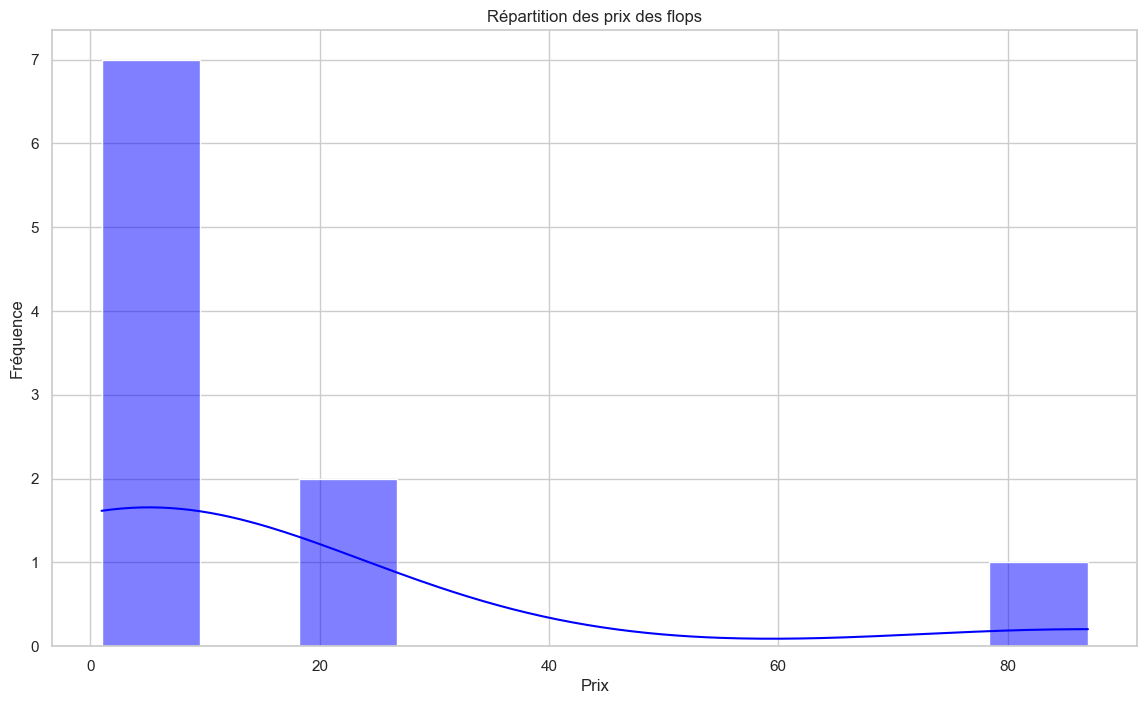

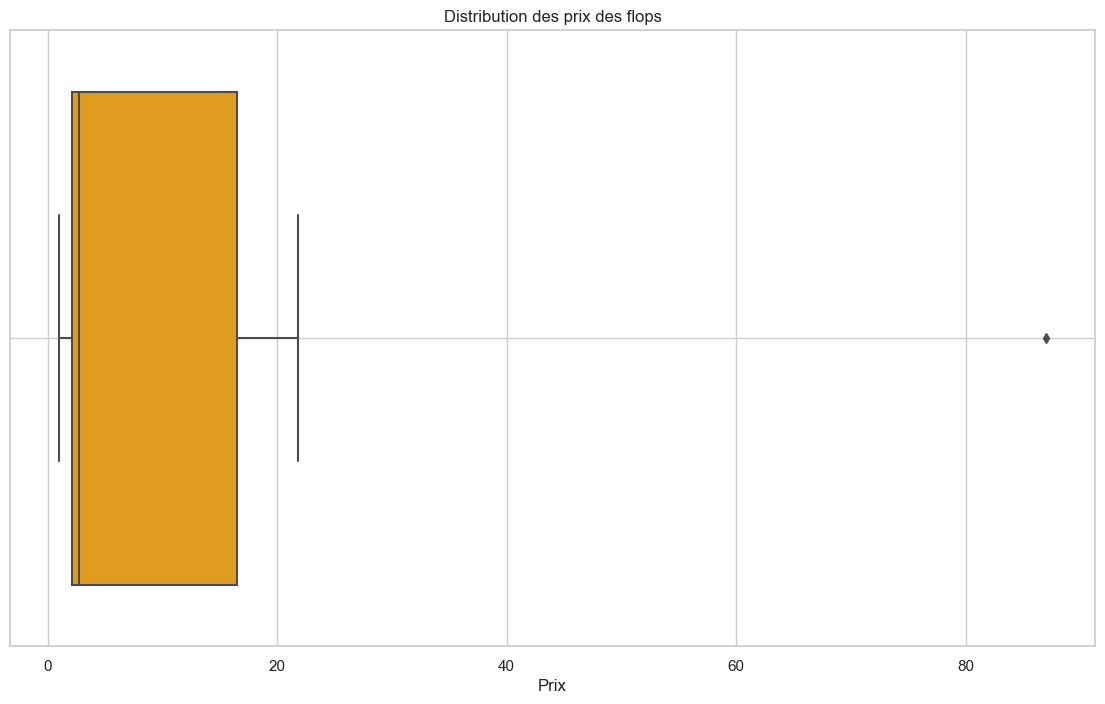

In [28]:
# Histogramme des prix des flops
plt.figure(figsize=(14, 8))
sns.histplot(flops['price'], bins=10, kde=True, color='blue')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Répartition des prix des flops')
plt.grid(True)
plt.show()

# Boxplot des prix des flops
plt.figure(figsize=(14, 8))
sns.boxplot(x=flops['price'], color='orange')
plt.xlabel('Prix')
plt.title('Distribution des prix des flops')
plt.grid(True)
plt.show()

In [29]:
# Compter le nombre de fois que chaque produit est vendu
ventes_par_produit = df_final.groupby('id_prod').size()

# Filtrer pour obtenir les produits vendus exactement une fois
produits_vendus_une_fois = ventes_par_produit[ventes_par_produit < 5]

# Joindre avec df_final pour obtenir les catégories des produits vendus une fois
df_produits_une_vente = df_final[df_final['id_prod'].isin(produits_vendus_une_fois.index)]

# Compter les produits vendus une fois par catégorie
produits_une_vente_par_categorie = df_produits_une_vente.groupby('categ')['id_prod'].nunique()

# Compter le nombre total de produits différents vendus dans chaque catégorie
total_produits_vendus_par_categorie = df_final.groupby('categ')['id_prod'].nunique()

# Calculer la proportion d'articles vendus une seule fois par catégorie
proportion_une_vente_par_categorie = produits_une_vente_par_categorie / total_produits_vendus_par_categorie

# Afficher les résultats
print(produits_une_vente_par_categorie)
print(proportion_une_vente_par_categorie)

categ
0    131
1     14
2     13
Name: id_prod, dtype: int64
categ
0    0.057155
1    0.018996
2    0.055085
Name: id_prod, dtype: float64


In [30]:
# Filtrer pour obtenir les produits vendus moins de cinq fois
produits_vendus_moins_cinq_fois = ventes_par_produit[ventes_par_produit < 5]

# Filtrer df_final pour inclure seulement ces produits
df_produits_moins_cinq_ventes = df_final[df_final['id_prod'].isin(produits_vendus_moins_cinq_fois.index)]

# Calculer le CA par produit vendu moins de cinq fois
ca_produits_moins_cinq_fois = df_produits_moins_cinq_ventes.groupby('id_prod')['price'].sum()

# Joindre avec df_final pour obtenir les catégories correspondantes
df_ca_produits_moins_cinq = df_produits_moins_cinq_ventes[['id_prod', 'categ']].drop_duplicates().set_index('id_prod')
df_ca_produits_moins_cinq['CA'] = ca_produits_moins_cinq_fois

# Calculer le CA total par catégorie pour ces produits
ca_par_categorie = df_ca_produits_moins_cinq.groupby('categ')['CA'].sum()

# Afficher les résultats
print(ca_par_categorie)

categ
0    6064.74
1    1479.70
2    4003.40
Name: CA, dtype: float64


In [31]:
for cat in df_final['categ'].unique():
    subset = df_ref[df_ref.categ == cat]
    print("-"*20)
    print("Catégorie",int(cat))
    print("Catégorie",int(cat),": Top des ventes")
    display(subset.head(10))
    print("")
    print("Catégorie",int(cat),": Flop des ventes")
    display(subset.tail(10))
    

--------------------
Catégorie 0
Catégorie 0 : Top des ventes


,id_prod,categ,price,nb_ventes
466,0_1422,0,11.41,1292
476,0_1431,0,10.99,1282
469,0_1425,0,12.99,1266
477,0_1432,0,15.36,1254
454,0_1411,0,8.99,1246
472,0_1428,0,3.55,1245
0,0_0,0,3.75,1242
468,0_1424,0,8.41,1238
479,0_1434,0,8.58,1235
487,0_1441,0,18.99,1235



Catégorie 0 : Flop des ventes


,id_prod,categ,price,nb_ventes
698,0_1633,0,24.99,1
595,0_1539,0,0.99,1
166,0_1151,0,2.99,1
802,0_1728,0,2.27,1
1327,0_2201,0,20.99,1
1792,0_549,0,2.99,1
2166,0_886,0,21.82,1
549,0_1498,0,2.48,1
1784,0_541,0,1.99,1
313,0_1284,0,1.38,1


--------------------
Catégorie 1
Catégorie 1 : Top des ventes


,id_prod,categ,price,nb_ventes
2591,1_369,1,23.99,2340
2644,1_417,1,20.99,2269
2641,1_414,1,23.83,2246
2733,1_498,1,23.37,2202
2653,1_425,1,16.99,2163
2629,1_403,1,17.99,2040
2640,1_413,1,17.99,2036
2639,1_412,1,16.65,2014
2632,1_406,1,24.81,2003
2633,1_407,1,15.99,2001



Catégorie 1 : Flop des ventes


,id_prod,categ,price,nb_ventes
2312,1_117,1,41.99,4
2452,1_243,1,42.99,4
2431,1_224,1,4.95,4
2634,1_408,1,35.24,3
2630,1_404,1,9.85,3
2344,1_146,1,31.98,3
2635,1_409,1,55.99,3
2752,1_514,1,67.66,2
2648,1_420,1,7.12,2
2628,1_402,1,34.52,2


--------------------
Catégorie 2
Catégorie 2 : Top des ventes


,id_prod,categ,price,nb_ventes
3034,2_102,2,59.14,1027
3070,2_135,2,68.99,1005
3045,2_112,2,67.57,968
3201,2_39,2,57.99,915
3199,2_37,2,48.99,882
3043,2_110,2,62.25,865
3151,2_208,2,54.87,831
3152,2_209,2,69.99,814
3150,2_207,2,50.99,786
3041,2_109,2,53.99,744



Catégorie 2 : Flop des ventes


,id_prod,categ,price,nb_ventes
3231,2_66,2,150.72,3
3243,2_78,2,167.49,3
3189,2_28,2,103.50,3
3065,2_130,2,142.58,3
3066,2_131,2,127.99,3
3242,2_77,2,145.99,2
3258,2_93,2,78.99,2
3263,2_98,2,149.74,1
3175,2_23,2,115.99,1
3247,2_81,2,86.99,1


### Répartition des ventes par catégorie

In [32]:
# Aggrégation par mois pour obtenir le nombre de ventes mensuelles

vente_mois = df_final.groupby('year_month')['date'].count().reset_index().rename(columns={'date':'nb_ventes'})

# calcul des indicateurs

print("Indicateurs du nombre de ventes mensuelles")
print("-"*43)
print(vente_mois['nb_ventes'].describe(include='all'))
print("")
print("median:",round(vente_mois['nb_ventes'].median(),2))
print("variance:",round(vente_mois['nb_ventes'].var(ddof=0),2))

Indicateurs du nombre de ventes mensuelles
-------------------------------------------
count       24.000000
mean     28647.250000
std       1879.723621
min      24738.000000
25%      28300.750000
50%      28582.000000
75%      29405.750000
max      33314.000000
Name: nb_ventes, dtype: float64

median: 28582.0
variance: 3386137.52


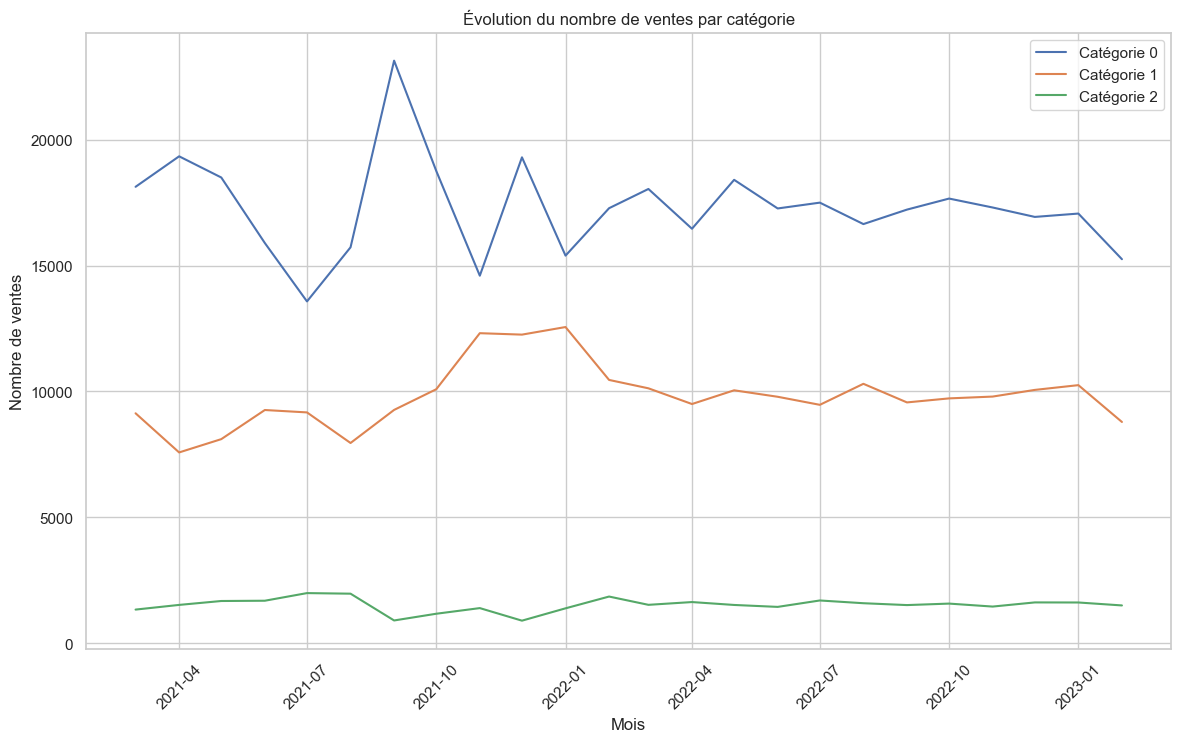

In [33]:
# Grouper par mois et par catégorie et compter le nombre de transactions
nombre_ventes_mensuel = df_final.groupby(['year_month', 'categ']).size().reset_index(name='nombre_ventes')

# Convertir les périodes en format datetime pour l'affichage
nombre_ventes_mensuel['year_month'] = nombre_ventes_mensuel['year_month'].dt.to_timestamp()

# Tracer le graphique
plt.figure(figsize=(14, 8))

for categ in nombre_ventes_mensuel['categ'].unique():
    df_categ = nombre_ventes_mensuel[nombre_ventes_mensuel['categ'] == categ]
    plt.plot(df_categ['year_month'], df_categ['nombre_ventes'], label=f'Catégorie {categ}')

plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.title('Évolution du nombre de ventes par catégorie')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

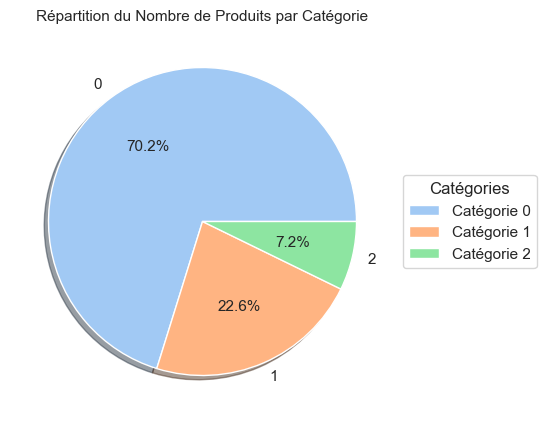

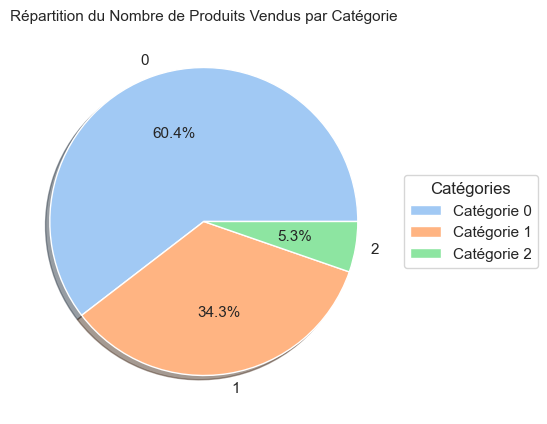

In [34]:
# Calculer le nombre de produits par catégorie
nombre_produits_par_categorie = df_final.groupby('categ')['id_prod'].nunique().reset_index()

# Calculer le nombre de produits vendus par catégorie
nombre_produits_vendus_par_categorie = df_final.groupby('categ')['id_prod'].count().reset_index()


# Configurer les couleurs
colors = sns.color_palette("pastel")

# Créer le pie chart pour le nombre de produits par catégorie
plt.figure(figsize=(10, 5))
plt.pie(x=nombre_produits_par_categorie['id_prod'], 
        labels=nombre_produits_par_categorie['categ'],
        colors=colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        shadow=True)
plt.title("Répartition du Nombre de Produits par Catégorie", fontsize=11)
plt.legend(title='Catégories',
           labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.savefig('pie_nombre_produits_categ.png')
plt.show()

# Créer le pie chart pour le nombre de produits vendus par catégorie
plt.figure(figsize=(10, 5))
plt.pie(x=nombre_produits_vendus_par_categorie['id_prod'], 
        labels=nombre_produits_vendus_par_categorie['categ'],
        colors=colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        shadow=True)
plt.title("Répartition du Nombre de Produits Vendus par Catégorie", fontsize=11)
plt.legend(title='Catégories',
           labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.savefig('pie_nombre_produits_vendus_categ.png')
plt.show()



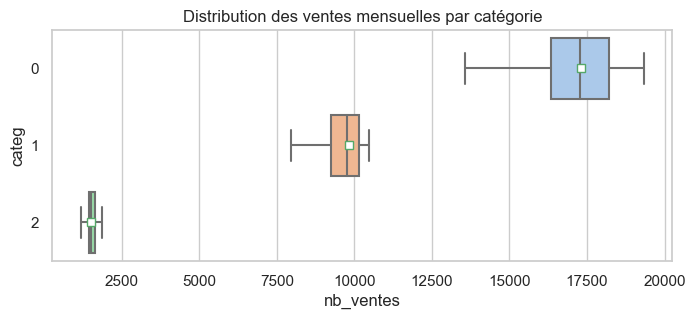

In [35]:
# Aggrégation par mois et catégorie de produit
categ = df_final.groupby(['categ','year_month'])['date'].count().reset_index().rename(columns={'date':'nb_ventes'})

# Distribution et moyenne des CA mensuel par catégorie
plt.figure(figsize=(8,3))
sns.boxplot(data=categ, y='categ', x='nb_ventes', 
            orient='h', 
            showmeans=True,
            showfliers=False,
            palette="pastel", 
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des ventes mensuelles par catégorie')
plt.savefig('ventes_mois_categ_boxplot.png')
plt.show()

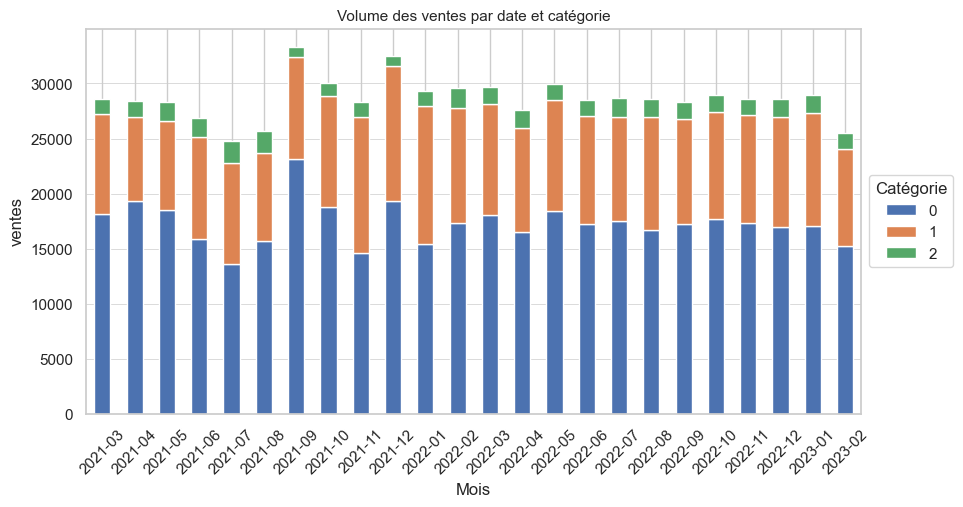

In [36]:
#Volume des ventes par mois et catégorie 
df_final.pivot_table(index='year_month', columns='categ',values='date', aggfunc='count')\
         .plot.bar(stacked=True,rot=45, figsize=(10,5))
plt.xlabel("Mois")
plt.ylabel("ventes")
plt.grid( linestyle='-', linewidth=0.5, axis='y')
plt.legend(title='Catégorie', loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title("Volume des ventes par date et catégorie",fontsize=11)
plt.show()

# Profils clients

### Répartition du chiffre d'affaires pour les clients BtoB

In [37]:
# Calculer le nombre de sessions par client, le nombre de produits achetés et le montant d'achat dépensé par client

clients_stats = df_final.groupby('client_id').agg({
    'session_id': 'nunique',  # Nombre de sessions uniques par client
    'id_prod': 'count',  # Nombre de produits achetés par client
    'price': 'sum'  # Montant total dépensé par client
}).reset_index()

# Renommer les colonnes pour plus de clarté
clients_stats.columns = ['client_id', 'nombre_sessions', 'nombre_produits', 'montant_achat']

# Ajouter le nombre de produits par session et le panier moyen par session
clients_stats['produits_par_session'] = clients_stats['nombre_produits'] / clients_stats['nombre_sessions']
clients_stats['panier_moyen'] = clients_stats['montant_achat'] / clients_stats['nombre_sessions']

# Afficher les premières lignes du DataFrame résultant
clients_stats


,client_id,nombre_sessions,nombre_produits,montant_achat,produits_par_session,panier_moyen
0,c_1,34,43,629.02,1.264706,18.500588
1,c_10,34,58,1353.60,1.705882,39.811765
2,c_100,5,8,254.85,1.600000,50.970000
3,c_1000,94,126,2291.88,1.340426,24.381702
4,c_1001,47,103,1823.85,2.191489,38.805319
...,...,...,...,...,...,...
8595,c_995,9,14,189.41,1.555556,21.045556
8596,c_996,80,96,1637.34,1.200000,20.466750
8597,c_997,24,59,1490.01,2.458333,62.083750
8598,c_998,24,55,2822.22,2.291667,117.592500


In [38]:
# Suppression des doublons sur client_id et tranche_age dans df_final
unique_clients = df_final[['client_id', 'tranche_age']].drop_duplicates()

# Merger les deux DataFrames sur 'client_id' pour récupérer la colonne 'tranche_age'
clients_stats_ok = pd.merge(clients_stats, unique_clients, on='client_id', how='left')

In [39]:
clients_stats_ok.describe()

,nombre_sessions,nombre_produits,montant_achat,produits_par_session,panier_moyen
count,8600.00000,8600.000000,8600.000000,8600.000000,8600.000000
mean,40.17500,79.945814,1398.565477,1.984160,40.405428
std,144.71613,313.532311,5202.771679,0.650943,22.764012
min,1.00000,1.000000,6.310000,1.000000,4.150000
25%,15.00000,28.000000,562.730000,1.425000,25.755467
50%,27.00000,52.000000,1045.695000,1.961538,32.339000
75%,50.00000,97.000000,1797.720000,2.421053,48.316550
max,10997.00000,25586.000000,326039.890000,8.200000,259.422500


In [40]:
clients_stats_ok.sort_values(by='montant_achat', ascending=False)

,client_id,nombre_sessions,nombre_produits,montant_achat,produits_par_session,panier_moyen,tranche_age
677,c_1609,10997,25586,326039.89,2.326635,29.648076,40-49
4388,c_4958,3851,5222,290227.03,1.356011,75.364069,20-29
6337,c_6714,2620,9199,153918.60,3.511069,58.747557,50-59
2724,c_3454,5571,6793,114110.57,1.219350,20.482960,50-59
634,c_1570,159,370,5285.82,2.327044,33.244151,40-49
...,...,...,...,...,...,...,...
3855,c_4478,1,1,13.36,1.000000,13.360000,50-59
4044,c_4648,1,1,11.20,1.000000,11.200000,20-29
7889,c_8114,2,2,9.98,1.000000,4.990000,60-69
7918,c_8140,2,2,8.30,1.000000,4.150000,50-59


In [41]:
# Ajout d'une colonne 'profil_client'

clients_stats_ok.loc[clients_stats_ok['montant_achat']<6000,'profil_client']='B2C'
clients_stats_ok.loc[clients_stats_ok['montant_achat']>=6000,'profil_client']='B2B'

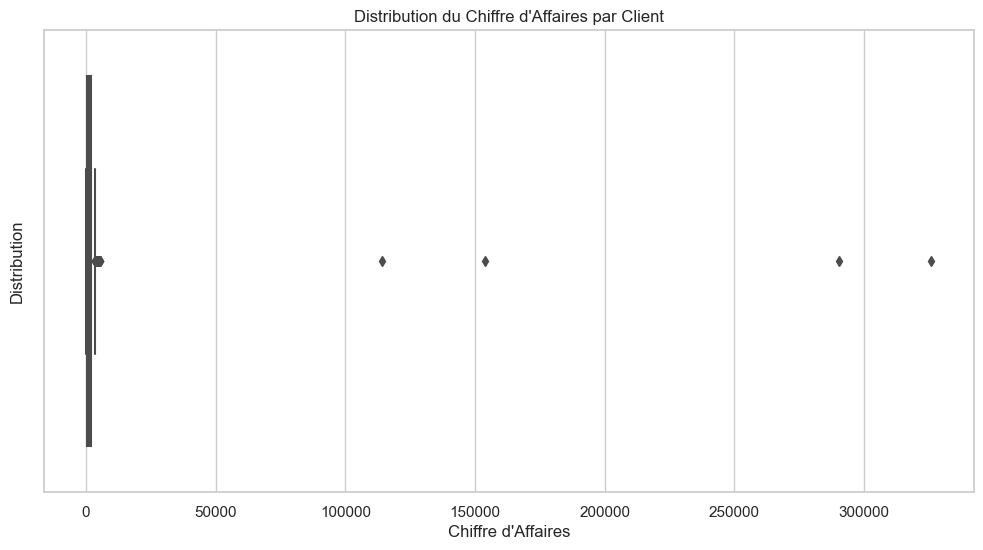

In [42]:
# Appliquer le style de Seaborn
sns.set(style="whitegrid")

# Créer un box plot pour le CA par client
plt.figure(figsize=(12, 6))
sns.boxplot(data=clients_stats_ok, x='montant_achat')
plt.title('Distribution du Chiffre d\'Affaires par Client')
plt.xlabel('Chiffre d\'Affaires')
plt.ylabel('Distribution')
plt.show()

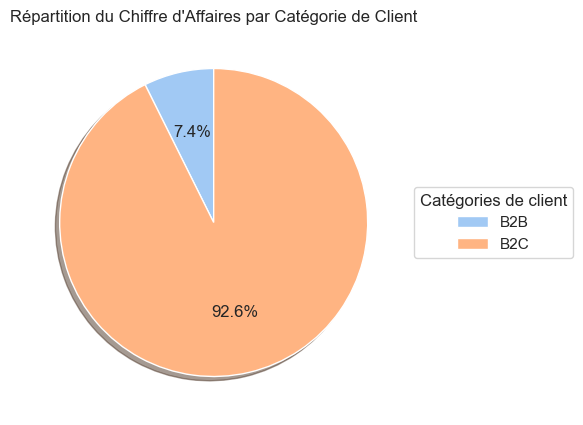

In [43]:
# Appliquer le style de Seaborn
sns.set(style="whitegrid")

# Aggréger les données pour obtenir le CA total par catégorie de client
ca_par_profil = clients_stats_ok.groupby('profil_client')['montant_achat'].sum()

# Créer un diagramme en secteurs pour le CA
plt.figure(figsize=(10, 5))
colors = sns.color_palette("pastel")
plt.pie(ca_par_profil, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.legend(title='Catégories de client',
           labels=["B2B", "B2C"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title('Répartition du Chiffre d\'Affaires par Catégorie de Client')
plt.show()

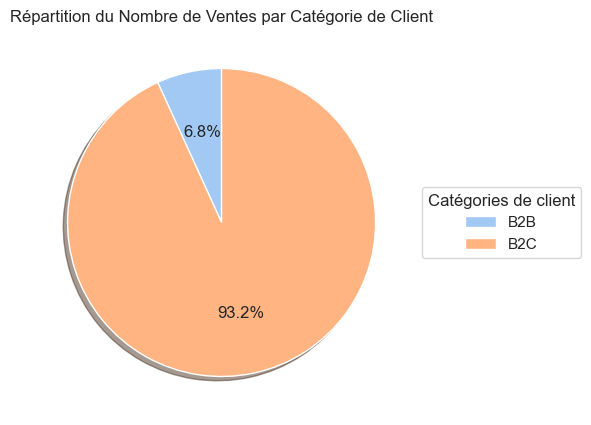

In [44]:
# Aggréger les données pour obtenir le nombre total de sessions (ventes) par catégorie de client
sessions_par_profil = clients_stats_ok.groupby('profil_client')['nombre_produits'].sum()

# Créer un diagramme en secteurs pour le nombre de sessions
plt.figure(figsize=(10, 5))
plt.pie(sessions_par_profil, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.legend(title='Catégories de client',
           labels=["B2B", "B2C"],
           fontsize=11,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title('Répartition du Nombre de Ventes par Catégorie de Client')
plt.show()

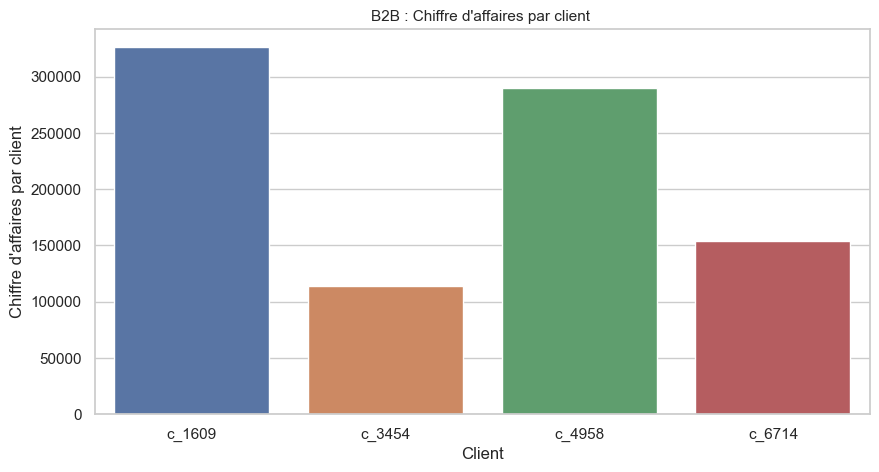

In [45]:
# Distrisbution du chiffre d'affaires par client B2B

plt.figure(figsize=(10,5))
sns.barplot(data=clients_stats_ok.loc[clients_stats_ok.profil_client=='B2B'],x='client_id',y='montant_achat')
plt.xlabel("Client")
plt.ylabel("Chiffre d'affaires par client")
plt.title("B2B : Chiffre d'affaires par client ",fontsize=11)
plt.savefig('CA_B2B.png')
plt.show()

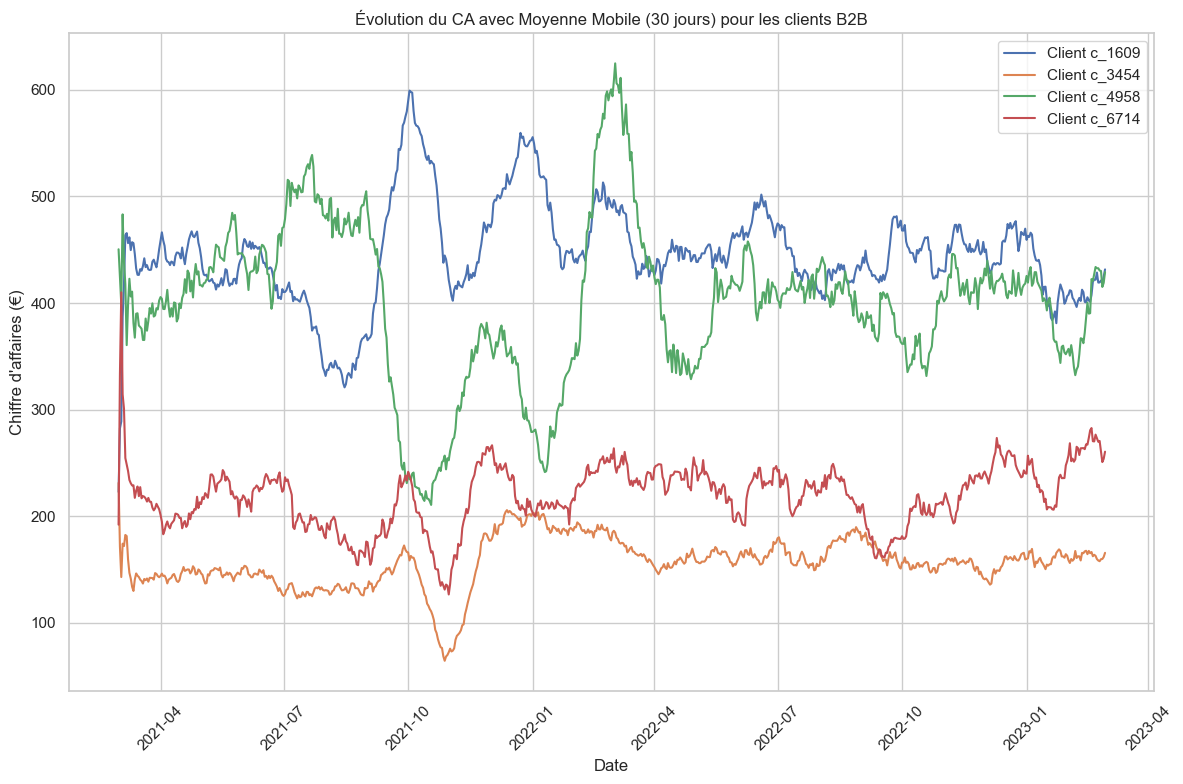

In [60]:
# Filtrer le DataFrame pour les clients B2B
filtered_clients = df_final[df_final['client_id'].isin(['c_1609', 'c_3454', 'c_4958', 'c_6714'])]

# Grouper par client_id et date pour obtenir le CA quotidien par client
grouped_data = filtered_clients.groupby(['client_id', 'date']).agg({'price': 'sum'}).reset_index()

# Calculer la moyenne mobile directement après regroupement pour éviter des copies inutiles
grouped_data['MM7'] = grouped_data.groupby('client_id')['price'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Préparer les données pour le tracé
fig, ax = plt.subplots(figsize=(12, 8))  # Créer une figure et un axe

# Tracer une ligne pour chaque client
for client in ['c_1609', 'c_3454', 'c_4958', 'c_6714']:
    data_to_plot = grouped_data[grouped_data['client_id'] == client]
    ax.plot(data_to_plot['date'], data_to_plot['MM7'], label=f'Client {client}')
    

# Configurer le graphique
ax.set_title('Évolution du CA avec Moyenne Mobile (30 jours) pour les clients B2B')
ax.set_xlabel('Date')
ax.set_ylabel('Chiffre d\'affaires (€)')
ax.legend()  
plt.xticks(rotation=45) 
plt.tight_layout()  

# Afficher le graphique
plt.show()

/var/folders/_j/xfbt165x0csf_hcdcvr8_p6c0000gn/T/ipykernel_24585/317535248.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20')  # tab20 est un bon choix pour beaucoup de catégories distinctes


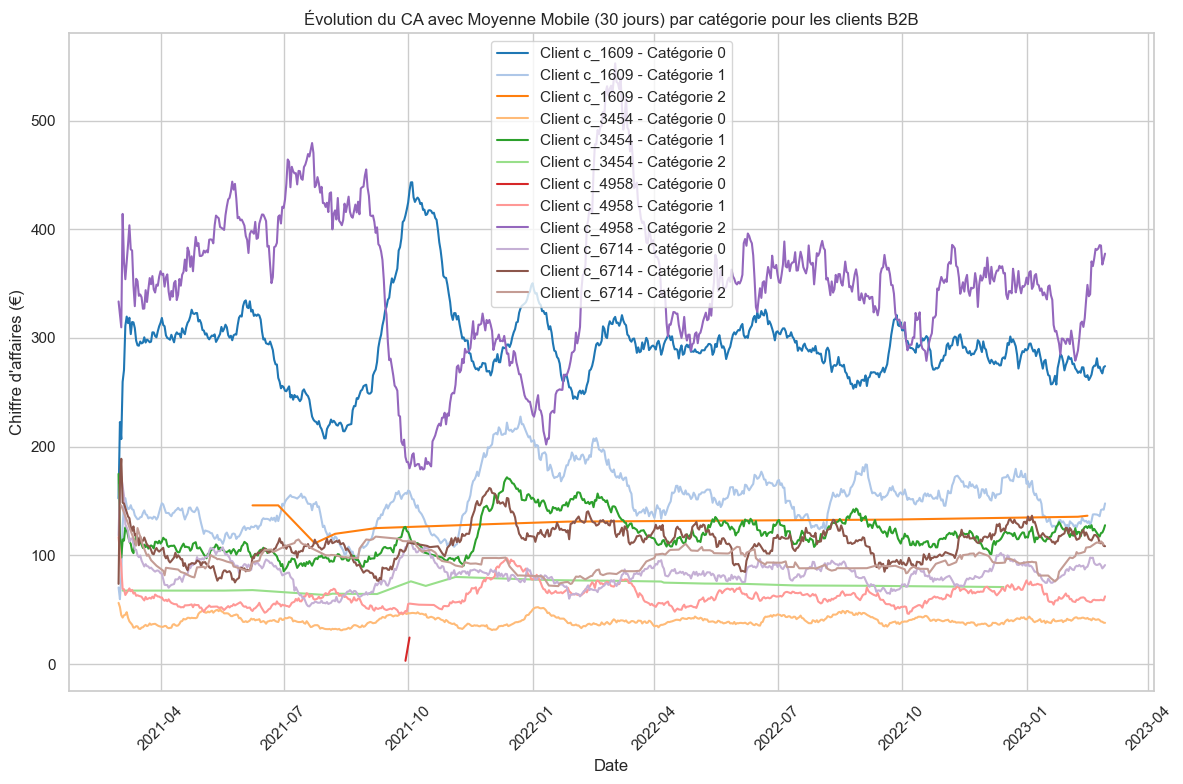

In [62]:
# Filtrer le DataFrame pour les clients B2B
filtered_clients = df_final[df_final['client_id'].isin(['c_1609', 'c_3454', 'c_4958', 'c_6714'])]

# Grouper par client_id, catégorie de produit et date pour obtenir le CA quotidien par client et catégorie
grouped_data = filtered_clients.groupby(['client_id', 'categ', 'date']).agg({'price': 'sum'}).reset_index()

# Calculer la moyenne mobile directement après regroupement pour éviter des copies inutiles
grouped_data['MM30'] = grouped_data.groupby(['client_id', 'categ'])['price'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Préparer les données pour le tracé
fig, ax = plt.subplots(figsize=(12, 8))

# Obtenir un générateur de couleurs
colormap = plt.cm.get_cmap('tab20')  # tab20 est un bon choix pour beaucoup de catégories distinctes
colors = [colormap(i) for i in range(colormap.N)]

# Tracer une ligne pour chaque catégorie de chaque client
client_categories = grouped_data.groupby(['client_id', 'categ'])
for (client, category), data in client_categories:
    color = colors.pop(0)  # Utiliser une couleur du colormap et la retirer de la liste
    ax.plot(data['date'], data['MM30'], label=f'Client {client} - Catégorie {category}', color=color)

# Configurer le graphique
ax.set_title('Évolution du CA avec Moyenne Mobile (30 jours) par catégorie pour les clients B2B')
ax.set_xlabel('Date')
ax.set_ylabel('Chiffre d\'affaires (€)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

### Courbe de Lorenz

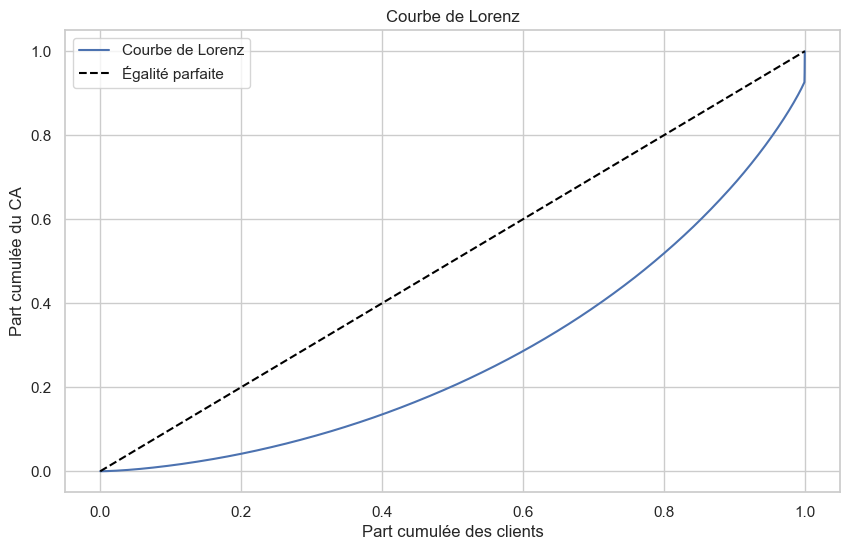

Indice de Gini: 0.44189587995615676


In [47]:
# Étape 1: Trier les clients par 'montant_achat' croissant
clients_stats_sorted = clients_stats_ok.sort_values(by='montant_achat')

# Calculer les parts cumulées de la population et des montants d'achat
cumulative_population = np.arange(1, len(clients_stats_sorted) + 1) / len(clients_stats_sorted)
cumulative_wealth = clients_stats_sorted['montant_achat'].cumsum() / clients_stats_sorted['montant_achat'].sum()

# Ajouter le point (0,0) pour la courbe de Lorenz
cumulative_population = np.insert(cumulative_population, 0, 0)
cumulative_wealth = np.insert(cumulative_wealth, 0, 0)

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(cumulative_population, cumulative_wealth, label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Égalité parfaite')
plt.xlabel('Part cumulée des clients')
plt.ylabel('Part cumulée du CA')
plt.title('Courbe de Lorenz')
plt.legend()
plt.grid(True)
plt.show()

# Calculer l'indice de Gini
AUC = np.trapz(cumulative_wealth, cumulative_population)
Gini_index = 1 - 2 * AUC

print(f"Indice de Gini: {Gini_index}")

# Analyse comportementale des clients

## Lien entre le genre d’un client et les catégories des livres achetés

### Hypothèse
Hypothèse nulle (H0) : Il n'y a pas de relation significative entre le genre des clients et les categories de livres achetés.

Hypothèse alternative (H1) : Il existe une relation significative entre le genre des clients et les catégories de livres achetés.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Il s'agit ici d'étudier la relation entre la variable "genre du client" et "catégorie des livres achetés" qui sont toutes deux des variables qualitatives. Nous effectuerons donc un test d'indépendance du Chi2.

In [48]:
df_final

,client_id,sex,birth,age,tranche_age,id_prod,date,session_id,year_month,price,categ
0,c_329,f,1967,57,50-59,0_1259,2021-03-01,s_1,2021-03,11.99,0
1,c_664,m,1960,64,60-69,0_1390,2021-03-01,s_2,2021-03,19.37,0
2,c_580,m,1988,36,30-39,0_1352,2021-03-01,s_3,2021-03,4.50,0
3,c_7912,f,1989,35,30-39,0_1458,2021-03-01,s_4,2021-03,6.55,0
4,c_2033,f,1956,68,60-69,0_1358,2021-03-01,s_5,2021-03,16.49,0
...,...,...,...,...,...,...,...,...,...,...,...
687529,c_3573,f,1996,28,20-29,1_508,2023-02-28,s_348444,2023-02,21.92,1
687530,c_50,f,1994,30,30-39,2_37,2023-02-28,s_348445,2023-02,48.99,2
687531,c_488,f,1985,39,30-39,1_695,2023-02-28,s_348446,2023-02,26.99,1
687532,c_4848,m,1953,71,70-79,0_1547,2023-02-28,s_348447,2023-02,8.99,0


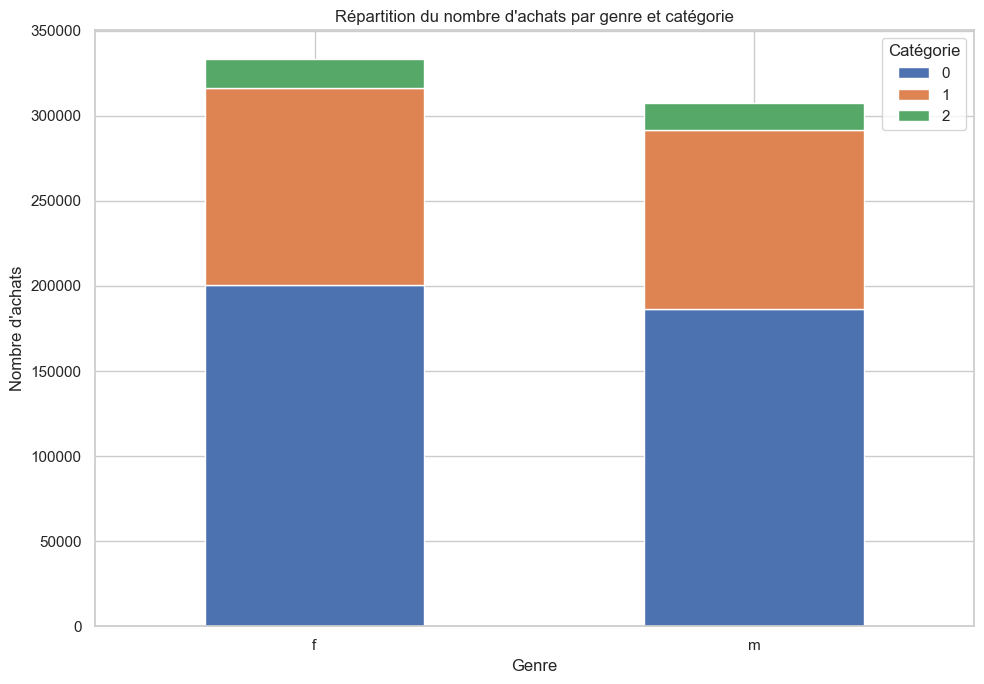

In [49]:
#Joindre df_final et clients_stats

df_final_2 = pd.merge(df_final, clients_stats_ok[['client_id', 'profil_client']], on='client_id', how='left')

#Conserver uniquement les clients B2C

df_final_B2C = df_final_2[df_final_2['profil_client'] == 'B2C']

# Création de la table de contingence
contingency_table = pd.crosstab(df_final_B2C['sex'], df_final_B2C['categ'])

# Plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))

# Ajout de titres et labels
plt.title('Répartition du nombre d\'achats par genre et catégorie')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'achats')
plt.legend(title='Catégorie')
plt.xticks(rotation=0)

# Affichage du graphique
plt.tight_layout()
plt.show()

In [50]:
# Effectuer le test du chi-carré
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Affichage des résultats
results = {
    'Chi2 Statistic': chi2,
    'P-Value': p,
    'Degrees of Freedom': dof,
    'Expected Frequencies': expected
}

print("Chi-2 resultats:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Affichage de la table de contingence
print("\nContingency Table:")
print(contingency_table)

Chi-2 resultats:
Chi2 Statistic: 22.66856665178056
P-Value: 1.1955928116587024e-05
Degrees of Freedom: 2
Expected Frequencies:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]

Contingency Table:
categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868


### Interprétation :

La p-valeur (1.1955928116587024e-05) est très petite, bien en dessous du seuil de 0.05. Cela signifie que nous rejetons l'hypothèse nulle selon laquelle le sexe des clients et les catégories des livres achetés sont indépendants.

En d'autres termes, il y a une association statistiquement significative entre le sexe des clients et les catégories des livres qu'ils achètent.


## Lien entre l'âge des clients et le montant total des achats

### Hypothèses

Hypothèse nulle (H0) : Il n'y a pas de relation significative entre l'âge des clients et le montant total des achats.

Hypothèse alternative (H1) : Il existe une relation significative entre l'âge des clients et le montant total des achats.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous commençons donc par représenter graphiquement la variable âge sous forme d'histogramme, puis nous utiliserons le test d'adéquation de Kolmogorov-Smirnov.

En utilisant la catégorisation par tranche d'age, il est également possible d'appliquer une ANOVA.


Test de Kolmogorov-Smirnov pour l'âge: Statistique = 0.06399118988651292, P-Value = 4.802543174125307e-31
Test de Kolmogorov-Smirnov pour le montant total des achats: Statistique = 0.10589907400752302, P-Value = 2.137067509720825e-84


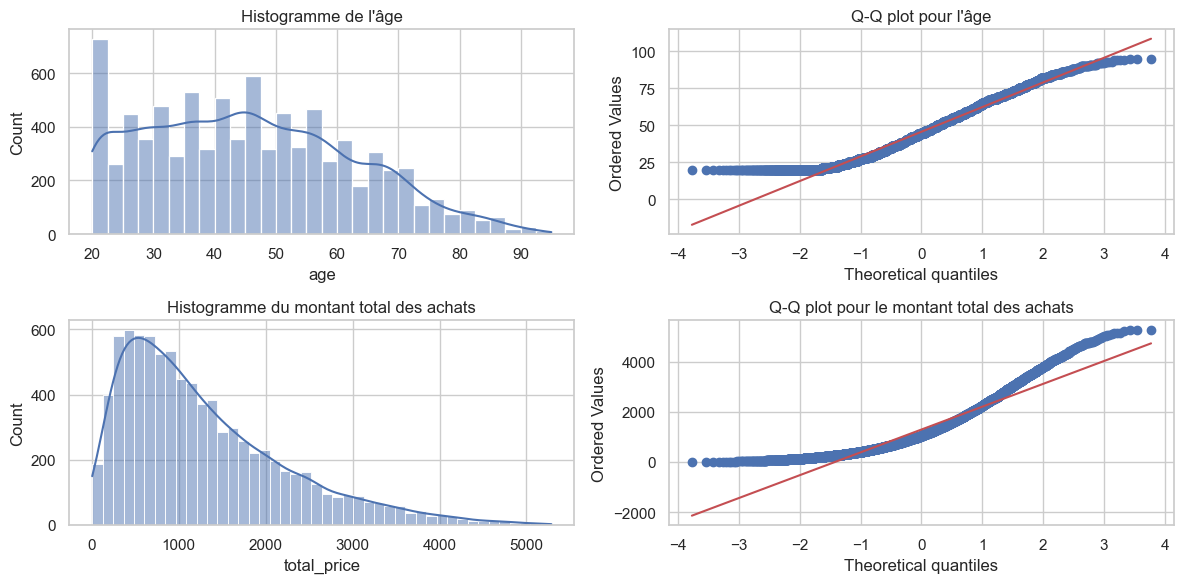

In [51]:
# Calcul du montant total des achats par client
df_total = df_final_B2C.groupby('client_id').agg({
    'age': 'first',
    'price': 'sum'
}).reset_index()

# Renommer la colonne pour plus de clarté
df_total.rename(columns={'price': 'total_price'}, inplace=True)

# Test de Kolmogorov-Smirnov pour l'âge
age_ks_stat, age_ks_p_value = stats.kstest(df_total['age'], 'norm', args=(df_total['age'].mean(), df_total['age'].std()))

# Test de Kolmogorov-Smirnov pour le montant total des achats
price_ks_stat, price_ks_p_value = stats.kstest(df_total['total_price'], 'norm', args=(df_total['total_price'].mean(), df_total['total_price'].std()))

# Afficher les résultats du test de Kolmogorov-Smirnov
print(f"Test de Kolmogorov-Smirnov pour l'âge: Statistique = {age_ks_stat}, P-Value = {age_ks_p_value}")
print(f"Test de Kolmogorov-Smirnov pour le montant total des achats: Statistique = {price_ks_stat}, P-Value = {price_ks_p_value}")

# Visualiser la distribution des variables avec des histogrammes et des Q-Q plots
plt.figure(figsize=(12, 6))

# Histogramme et Q-Q plot pour l'âge
plt.subplot(2, 2, 1)
sns.histplot(df_total['age'], kde=True)
plt.title('Histogramme de l\'âge')

plt.subplot(2, 2, 2)
stats.probplot(df_total['age'], dist="norm", plot=plt)
plt.title('Q-Q plot pour l\'âge')

# Histogramme et Q-Q plot pour le montant total des achats
plt.subplot(2, 2, 3)
sns.histplot(df_total['total_price'], kde=True)
plt.title('Histogramme du montant total des achats')

plt.subplot(2, 2, 4)
stats.probplot(df_total['total_price'], dist="norm", plot=plt)
plt.title('Q-Q plot pour le montant total des achats')

plt.tight_layout()
plt.show()

Pour l'âge:

La p-value extrêmement faible indique une différence statistiquement significative. Nous rejetons l'hypothèse nulle que l'âge suit une distribution normale.

Pour le montant total des achats:

La p-value extrêmement faible confirme de manière significative que le montant total des achats ne suit pas une distribution normale.

Coefficient de corrélation de Spearman: -0.18453804793783096
P-Value: 1.0212910436382683e-66


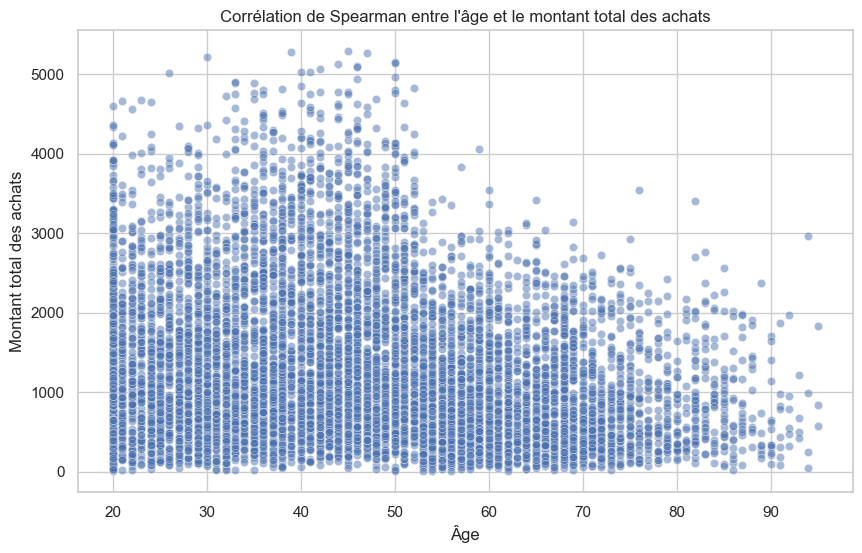

In [52]:
# Effectuer le test de corrélation de Spearman
correlation, p_value = spearmanr(df_total['age'], df_total['total_price'])

# Afficher les résultats
print(f"Coefficient de corrélation de Spearman: {correlation}")
print(f"P-Value: {p_value}")

# Visualiser la relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_price', data=df_total, alpha=0.5)
plt.xlabel('Âge')
plt.ylabel('Montant total des achats')
plt.title('Corrélation de Spearman entre l\'âge et le montant total des achats')
plt.grid(True)
plt.show()

### Interprétation

Coefficient de corrélation de Spearman : La valeur de -0.1845 indique une faible corrélation négative entre l'âge des clients et le montant total de leurs achats. Cela signifie que, en général, à mesure que l'âge des clients augmente, le montant total de leurs achats a tendance à diminuer légèrement.

P-Value : La p-valeur est extrêmement faible (bien en dessous de 0.05), ce qui signifie que cette corrélation est statistiquement significative. Nous pouvons donc rejeter l'hypothèse nulle (qu'il n'y a pas de corrélation) et conclure qu'il existe une relation significative entre l'âge des clients et le montant total de leurs achats.

### Conclusion

Nous pouvons donc rejeter l'hypothèse nulle (qu'il n'y a pas de corrélation)

### ANOVA

In [53]:
# Création d'une copie du DataFrame pour éviter SettingWithCopyWarning
df_final_B2C = df_final_B2C.copy()

# Préparation des données pour un test ANOVA
df_final_B2C['total_achat'] = df_final_B2C.groupby('client_id')['price'].transform('sum')

# Modèle ANOVA
model = ols('total_achat ~ C(tranche_age)', data=df_final_B2C).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_results)

                      sum_sq        df            F  PR(>F)
C(tranche_age)  7.772700e+10       7.0  9636.879545     0.0
Residual        7.382608e+11  640726.0          NaN     NaN


Les résultats indiquent clairement qu'il existe une différence significative dans le montant total des achats entre les différentes tranches d'âge des clients. Cela signifie que l'âge des clients a un effet notable sur le comportement d'achat en termes de montant dépensé, et que cet effet n'est pas dû au hasard.

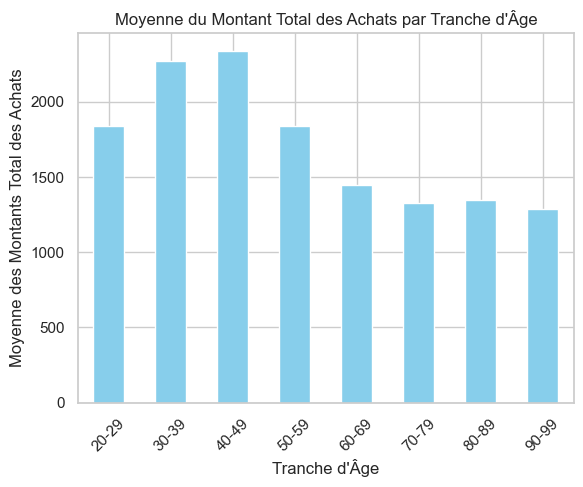

In [54]:
# Calcul des moyennes
mean_achats = df_final_B2C.groupby('tranche_age')['total_achat'].mean()

mean_achats.plot(kind='bar', color='skyblue')
plt.title('Moyenne du Montant Total des Achats par Tranche d\'Âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Moyenne des Montants Total des Achats')
plt.xticks(rotation=45)
plt.show()

Interprétation des Résultats

df (degrés de liberté) :
C(tranche_age) : 7 degrés de liberté, ce qui correspond aux nombre de tranches d'âge moins un (si vous avez 8 tranches d'âge).
Residual : 687526 degrés de liberté, qui représentent le nombre d'observations moins le nombre de groupes.

F (Statistique F) :
La statistique F de 5097.97 est extrêmement élevée, ce qui indique que les moyennes des montants totaux des achats sont très différenciées entre les tranches d'âge.

PR(>F) (Valeur-p) :
Une valeur-p de 0.0 suggère que l'effet de la tranche d'âge sur le montant total des achats est statistiquement significatif. En termes statistiques, cela signifie que vous pouvez rejeter l'hypothèse nulle qui supposait qu'il n'y avait pas d'association significative entre les tranches d'âge et le montant total des achats.

Conclusion:

Les résultats indiquent clairement qu'il existe une différence significative dans le montant total des achats entre les différentes tranches d'âge des clients. Cela signifie que l'âge des clients a un effet notable sur le comportement d'achat en termes de montant dépensé, et que cet effet n'est pas dû au hasard.

## Lien entre l'âge des clients et la fréquence d’achat

### Hypothèses

Hypothèse nulle (H0) : Il n'y a pas de relation significative entre l'âge des clients et la fréquence d'achat.

Hypothèse alternative (H1) : Il existe une relation significative entre l'âge des clients et la fréquence d'achat.

Nous sommes à nouveau dans la situation où nous souhaitons analyser la relation entre 2 variables quantitatives. La distribution de la variable "âge" ne suivant pas une loi normale, nous optons à nouveau pour un test non paramétrique qui sera toujours le test de corrélation de Spearman.

En utilisant la catégorisation par tranche d'age, il est également possible d'appliquer une ANOVA.

Coefficient de corrélation de Spearman: 0.21196373259671872
P-Value: 6.629168433162815e-88


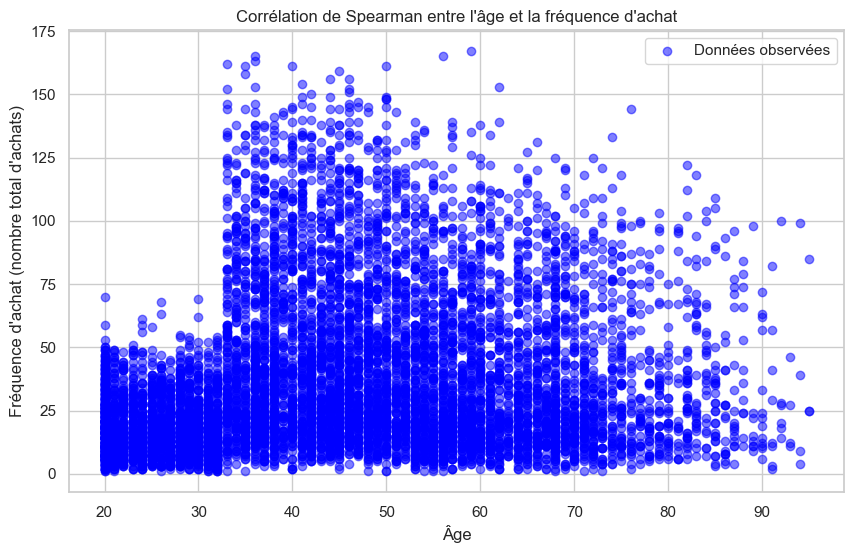

In [55]:
# Calculer la fréquence d'achat par client en utilisant 'session_id'
df_frequency = df_final_B2C.groupby('client_id').agg({
    'age': 'first',
    'session_id': 'nunique'
}).rename(columns={'session_id': 'purchase_frequency'}).reset_index()

# Renommer les colonnes pour plus de clarté
df_frequency.rename(columns={'purchase_frequency': 'total_purchases'}, inplace=True)

# Effectuer le test de corrélation de Spearman
correlation_spearman, p_value_spearman = spearmanr(df_frequency['age'], df_frequency['total_purchases'])

# Afficher les résultats
print(f"Coefficient de corrélation de Spearman: {correlation_spearman}")
print(f"P-Value: {p_value_spearman}")

# Visualiser la relation
plt.figure(figsize=(10, 6))
plt.scatter(df_frequency['age'], df_frequency['total_purchases'], color='blue', alpha=0.5, label='Données observées')
plt.xlabel('Âge')
plt.ylabel('Fréquence d\'achat (nombre total d\'achats)')
plt.title('Corrélation de Spearman entre l\'âge et la fréquence d\'achat')
plt.grid(True)
plt.legend()
plt.show()

### Interprétation

Coefficient de corrélation de Spearman :
Un coefficient de 0.212 indique une faible corrélation positive entre l'âge des clients et leur fréquence d'achat. Cela signifie que, dans l'ensemble, à mesure que l'âge des clients augmente, leur fréquence d'achat a tendance à augmenter légèrement.
P-Value :

La p-value très faible (bien en dessous du seuil typique de 0.05) indique que la corrélation observée est statistiquement significative. En d'autres termes, il est très peu probable que cette corrélation soit due au hasard.

### Conclusion

Faible corrélation positive : Bien que la corrélation soit statistiquement significative, elle est relativement faible, ce qui signifie que l'âge explique une petite partie de la variation dans la fréquence d'achat des clients.
D'autres facteurs pourraient être plus déterminants pour expliquer la fréquence des achats des clients.

### ANOVA

                      sum_sq        df            F  PR(>F)
C(tranche_age)  1.166600e+08       7.0  13402.51851     0.0
Residual        7.967277e+08  640726.0          NaN     NaN


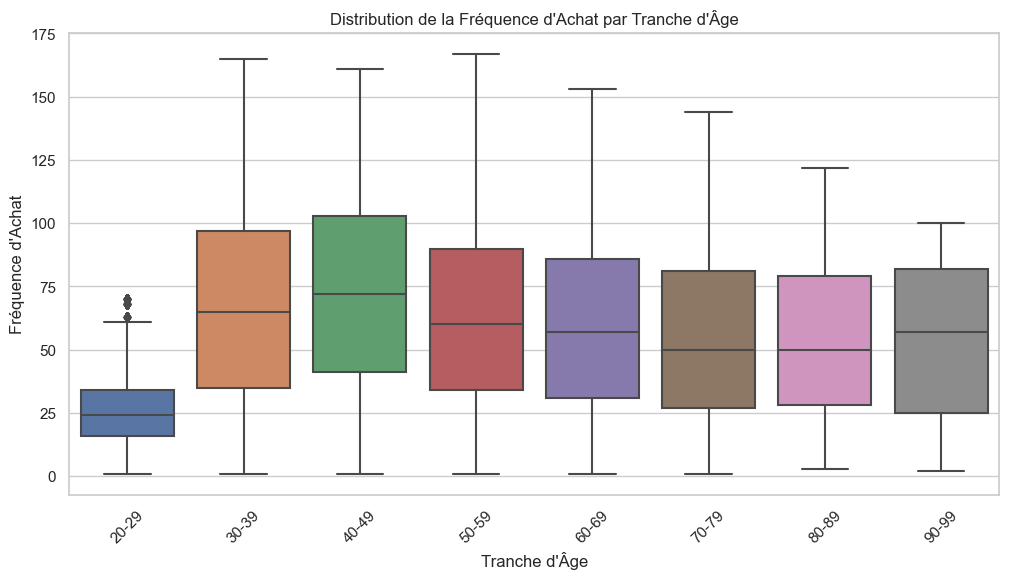

In [56]:
df_final_B2C['purchase_frequency'] = df_final_B2C.groupby('client_id')['session_id'].transform('nunique')

# Modèle ANOVA pour explorer l'effet des tranches d'âge sur la fréquence des achats
model = ols('purchase_frequency ~ C(tranche_age)', data=df_final_B2C).fit()
anova_results = sm.stats.anova_lm(model, typ=2)  # Utiliser le type II de la somme des carrés

# Afficher les résultats
print(anova_results)

# Visualisation avec un Boxplot pour montrer la distribution de la fréquence d'achat par tranche d'âge
plt.figure(figsize=(12, 6))
sns.boxplot(x='tranche_age', y='purchase_frequency', data=df_final_B2C)
plt.title('Distribution de la Fréquence d\'Achat par Tranche d\'Âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Fréquence d\'Achat')
plt.xticks(rotation=45)
plt.show()

Interprétation des Résultats

df (degrés de liberté) :

C(tranche_age) : 7 degrés de liberté, correspondant aux nombre de tranches d'âge moins un.
Residual : 640726, représentant le nombre d'observations individuelles moins le nombre de groupes.

F (Statistique F) :
La valeur F de 13402.52 est extrêmement élevée, suggérant que les différences entre les groupes d'âge en termes de fréquence d'achat sont très marquées et statistiquement significatives.

PR(>F) (Valeur-p) :
Une valeur-p de 0.0 indique que vous pouvez rejeter avec confiance l'hypothèse nulle qui affirmait qu'il n'y a pas de relation significative entre l'âge des clients et la fréquence d'achat. Il existe donc une relation très significative.

Conclusion:

Les résultats confirment clairement l'hypothèse alternative (H1), c'est-à-dire qu'il existe une association significative entre les tranches d'âge des clients et la fréquence des achats. Les différentes tranches d'âge montrent des comportements d'achat distincts quant à la fréquence avec laquelle ils effectuent des achats.

## Lien entre l'âge des clients et la taille du panier moyen

### Hypothèses 

Hypothèse nulle (H0) : Il n'y a pas de différence significative entre les tailles moyennes des paniers des différentes tranches d'âge.

Hypothèse alternative (H1) : Il existe une différence significative entre les tailles moyennes des paniers des différentes tranches d'âge.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous sommes à nouveau dans la situation où nous souhaitons analyser la relation entre 2 variables quantitatives. La distribution de la variable "âge" ne suivant pas une loi normale, nous optons à nouveau pour un test non paramétrique qui sera toujours le test de corrélation de Spearman. 


Corrélation de Spearman: -0.32586821258009735
P-value: 8.352869998649884e-212


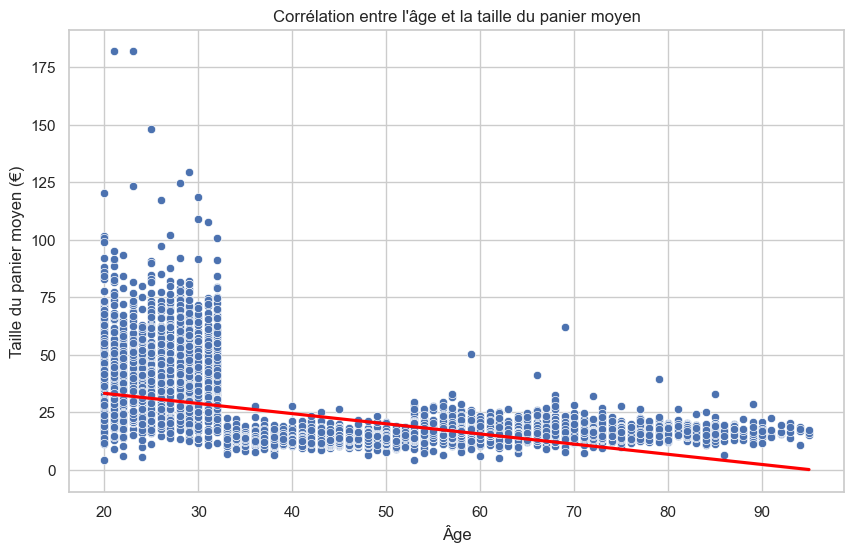

In [57]:
# Calcul du panier moyen pour chaque client
panier_moyen = df_final_B2C.groupby('client_id').agg({
    'price': 'mean',  # Moyenne des dépenses par transaction pour chaque client
    'age': 'first'  # L'âge est constant par client, donc nous prenons la première valeur
}).reset_index()

# Application du test de corrélation de Spearman
correlation, p_value = spearmanr(panier_moyen['age'], panier_moyen['price'])

# Affichage des résultats
print(f"Corrélation de Spearman: {correlation}")
print(f"P-value: {p_value}")


# Création du scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=panier_moyen)

# Ajout d'une ligne de tendance
sns.regplot(x='age', y='price', data=panier_moyen, scatter=False, color='red')

# Personnalisation du graphique
plt.title('Corrélation entre l\'âge et la taille du panier moyen')
plt.xlabel('Âge')
plt.ylabel('Taille du panier moyen (€)')
plt.grid(True)
plt.show()

### Interprétation

Coefficient de Corrélation de Spearman :

Le coefficient de corrélation de Spearman de -0.326 indique une corrélation négative modérée entre l'âge des clients et la taille moyenne du panier. Cela signifie que, dans l'ensemble, à mesure que l'âge des clients augmente, la taille moyenne de leur panier a tendance à diminuer.

P-Value : La p-value extrêmement faible indique que la corrélation observée est statistiquement significative. En d'autres termes, il est très peu probable que cette corrélation soit due au hasard.

### Conclusion

Les résultats indiquent que la taille moyenne des paniers varie de manière significative en fonction de la tranche d'âge des clients.

## Lien entre l'âge des clients et la catégorie des livres achetés

### Hypothèses

Hypothèse nulle (H0) : Il n'y a pas d'association significative entre les tranches d'âge des clients et les catégories de livres achetés.

Hypothèse alternative (H1) : Il existe une association significative entre les tranches d'âge des clients et les catégories de livres achetés.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous sommes ici dans la situation où nous souhaitons analyser la corrélation entre 1 variable quantitative (âge) et 1 variable qualitative à 3 modalités (catégories 0,1,2). Nous effectuerons donc un test d'indépendance du Chi2.

Chi2 Statistic: 209618.73091797682
P-Value: 0.0
Degrees of Freedom: 14
Expected Frequencies:
[[3.66353100e+04 2.08683941e+04 3.10729590e+03]
 [9.12513033e+04 5.19790379e+04 7.73965883e+03]
 [1.26626974e+05 7.21299099e+04 1.07401160e+04]
 [6.83233329e+04 3.89186892e+04 5.79497791e+03]
 [3.77946131e+04 2.15287624e+04 3.20562447e+03]
 [1.81656400e+04 1.03476055e+04 1.54075450e+03]
 [7.38617557e+03 4.20735141e+03 6.26473014e+02]
 [1.09765097e+03 6.25249604e+02 9.30994266e+01]]


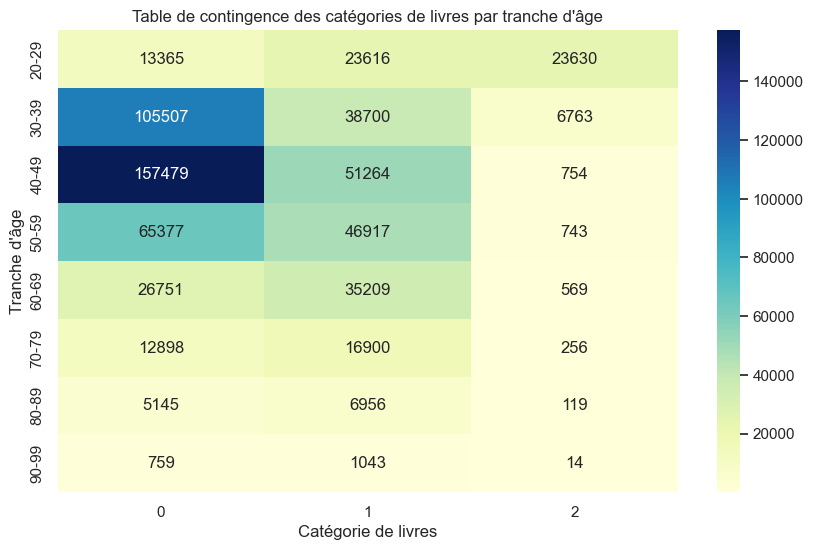

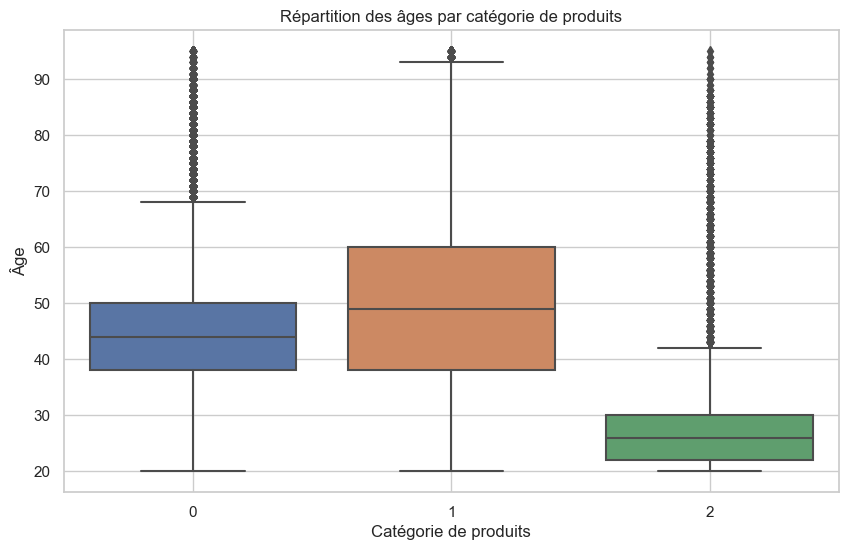

In [58]:
# Calculer le nombre d'achats par catégorie et par tranche d'âge
contingency_table = pd.crosstab(df_final_B2C['tranche_age'], df_final_B2C['categ'])

# Effectuer le test du chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Visualiser la table de contingence
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Table de contingence des catégories de livres par tranche d\'âge')
plt.xlabel('Catégorie de livres')
plt.ylabel('Tranche d\'âge')
plt.show()

# Création du box plot pour les âges par catégorie de produits
plt.figure(figsize=(10, 6))
sns.boxplot(x='categ', y='age', data=df_final_B2C)

# Personnalisation du graphique
plt.title('Répartition des âges par catégorie de produits')
plt.xlabel('Catégorie de produits')
plt.ylabel('Âge')
plt.grid(True)
plt.show()

### Interprétation

Chi2 Statistic : La valeur élevée de la statistique chi2 indique qu'il existe une variance significative entre les groupes de tranches d'âge par rapport à la variance au sein des groupes.

P-Value : La p-valeur est extrêmement faible (0.0), ce qui signifie que nous pouvons rejeter l'hypothèse nulle. Cela indique qu'il existe une association significative entre les tranches d'âge et les catégories de livres achetés.

Degrees of Freedom : Le nombre de degrés de liberté pour le test est de 14.

Expected Frequencies : Les fréquences attendues si les tranches d'âge et les catégories de livres étaient indépendantes.

### Conclusion

Les résultats indiquent que les tranches d'âge des clients et les catégories de livres qu'ils achètent sont statistiquement associées.
